# NoShow - EDA - R

In [86]:
library(DBI)
library(odbc)
if(!require(mechkar)) {install.packages("mechkar");require(mechkar)}
library(dplyr)
library(ggplot2)
if (!require("car")) install.packages("car")
if (!require("tibble")) install.packages("tibble")
if (!require("gridExtra")) install.packages("gridExtra")
if (!require("gtools")) install.packages("gtools")
if (!require("chron")) install.packages("chron")
chron

Loading required package: chron



function (dates. = NULL, times. = NULL, format = c(dates = "m/d/y", 
    times = "h:m:s"), out.format, origin.) 
{
    if (is.null(format)) 
        format <- c(dates = "m/d/y", times = "h:m:s")
    if (missing(out.format)) {
        if (is.character(format)) 
            out.format <- format
        else stop("must specify the \"out.format\" argument")
    }
    given <- c(dates = !missing(dates.), times = !missing(times.))
    if (is.null(default.origin <- getOption("chron.origin"))) 
        default.origin <- c(month = 1, day = 1, year = 1970)
    if (all(!given)) 
        return(structure(numeric(0), format = format, origin = default.origin, 
            class = c("chron", "dates", "times")))
    if (inherits(dates., "dates")) {
        if (missing(origin.)) 
            origin. <- origin(dates.)
        else origin(dates.) <- origin.
    }
    else if (missing(origin.)) 
        origin. <- default.origin
    if (given["dates"] && !given["times"]) {
        if (missing(format) && inherits(dates., "dates")) 
            format <- attr(dates., "format")
        fmt <- switch(mode(format), character = , list = format[[1]], 
            name = , `function` = format, `NULL` = c(dates = "m/d/y"), 
            stop("unrecognized format"))
        dts <- convert.dates(dates., format = fmt, origin. = origin.)
        tms <- dts - floor(dts)
        if (!all(is.na(tms)) && any(tms[!is.na(tms)] != 0)) 
            return(chron(dates. = floor(dts), times. = tms, format = format, 
                out.format = out.format, origin. = origin.))
        ofmt <- switch(mode(out.format), character = , list = out.format[[1]], 
            name = , `function` = out.format, `NULL` = c(dates = "m/d/y"), 
            stop("invalid output format"))
        attr(dts, "format") <- ofmt
        attr(dts, "origin") <- origin.
        class(dts) <- c("dates", "times")
        names(dts) <- names(dates.)
        return(dts)
    }
    if (given["times"] && !given["dates"]) {
        if (missing(format) && inherits(times., "times")) {
            format <- attr(times., "format")
            if (!is.name(format)) 
                format <- rev(format)[[1]]
        }
        fmt <- switch(mode(format), character = , list = rev(format)[[1]], 
            name = , `function` = format, `NULL` = c(times = "h:m:s"), 
            stop("invalid times input format"))
        tms <- convert.times(times., fmt)
        ofmt <- switch(mode(out.format), character = , list = rev(out.format)[[1]], 
            name = , `function` = out.format, `NULL` = c(dates = "m/d/y"), 
            stop("invalid times output format"))
        attr(tms, "format") <- ofmt
        class(tms) <- "times"
        names(tms) <- names(times.)
        return(tms)
    }
    if (length(times.) != length(dates.)) {
        if (length(times.) == 1) 
            times. <- rep.int(times., length(dates.))
        else if (length(dates.) == 1) 
            dates. <- rep.int(dates., length(times.))
        else stop(paste(deparse(substitute(dates.)), "and", deparse(substitute(times.)), 
            "must have equal lengths"))
    }
    if (missing(format)) {
        if (is.null(fmt.d <- attr(dates., "format"))) 
            fmt.d <- format[1]
        if (is.null(fmt.t <- attr(times., "format"))) 
            fmt.t <- format[2]
        if (mode(fmt.d) == "character" && mode(fmt.t) == "character") 
            format <- structure(c(fmt.d, fmt.t), names = c("dates", 
                "times"))
        else {
            fmt.d <- if (is.name(fmt.d)) 
                fmt.d
            else fmt.d[[1]]
            fmt.t <- if (is.name(fmt.t)) 
                fmt.t
            else rev(fmt.t)[[1]]
            format <- list(dates = fmt.d, times = fmt.t)
        }
    }
    if (any(length(format) != 2, length(out.format) != 2)) 
        stop("misspecified chron format(s) length")
    if (all(mode(format) != c("character", "list"))) 
        stop("misspecified input format(s)")
    if (all(mode(out.format) != c("l

In [2]:
con <- dbConnect(odbc(), 
                 Driver = "SQL Server", 
                 Server = "DESKTOP-AAGNMGA\\SQLEXPRESS", 
                 Database = "NoShow", 
                 Trusted_Connection = "True")

In [87]:
df <- dbReadTable(con,"NoShow_ff")
head(df)

,Client_Code,Booking_Date,sunday,monday,wednesday,thursday,friday,saturday,time_booked,cancel_days,...,Canceled_By_HOUSE,Canceled_By_JJ,Canceled_By_JOANNE,Canceled_By_KELLY,Canceled_By_SINEAD,quantity,amount,avg_receipt,avg_quantity,total_cancel12
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<dbl>,...,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,NA,2018-04-13,0,0,0,0,1,0,NA,0,...,NA,NA,NA,NA,NA,NA,NA,0,0,0
2,NA,2018-04-13,0,0,0,0,1,0,18:00:00,NA,...,NA,NA,NA,NA,NA,NA,NA,0,0,0
3,.L01,2018-05-23,0,0,1,0,0,0,10:40:00,NA,...,NA,NA,NA,NA,NA,2,262,0,0,1
4,.L01,2018-05-23,0,0,1,0,0,0,13:10:00,NA,...,NA,NA,NA,NA,NA,2,262,0,0,1
5,.L01,2018-06-27,0,0,1,0,0,0,NA,5,...,0,0,0,1,0,NA,NA,262,2,1
6,.L01,2018-08-22,0,0,1,0,0,0,11:00:00,NA,...,NA,NA,NA,NA,NA,NA,NA,262,2,1


In [88]:
summary(df)

 Client_Code        Booking_Date           sunday            monday         
 Length:2184        Length:2184        Min.   :0.00000   Min.   :0.0000000  
 Class :character   Class :character   1st Qu.:0.00000   1st Qu.:0.0000000  
 Mode  :character   Mode  :character   Median :0.00000   Median :0.0000000  
                                       Mean   :0.02976   Mean   :0.0004579  
                                       3rd Qu.:0.00000   3rd Qu.:0.0000000  
                                       Max.   :1.00000   Max.   :1.0000000  
                                                                            
   wednesday         thursday          friday          saturday     
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :0.0000   Median :0.0000   Median :0.0000   Median :0.0000  
 Mean   :0.1456   Mean   :0.2083   Mean   :0.2152   Mean   :0.1969  
 3rd Qu.:0.0000   3rd Qu.:0.0000   3rd 

In [90]:
df$Booking_Date <- as.Date( df$Booking_Date)
df$time_booked <- chron(times=df$time_booked)

In [91]:
typeof(df$Booking_Date)
typeof(df$time_booked)

[1] "double"

[1] "double"

In [92]:
summary(df)

 Client_Code         Booking_Date            sunday            monday         
 Length:2184        Min.   :2018-03-14   Min.   :0.00000   Min.   :0.0000000  
 Class :character   1st Qu.:2018-05-11   1st Qu.:0.00000   1st Qu.:0.0000000  
 Mode  :character   Median :2018-06-09   Median :0.00000   Median :0.0000000  
                    Mean   :2018-06-11   Mean   :0.02976   Mean   :0.0004579  
                    3rd Qu.:2018-07-12   3rd Qu.:0.00000   3rd Qu.:0.0000000  
                    Max.   :2019-02-15   Max.   :1.00000   Max.   :1.0000000  
                                                                              
   wednesday         thursday          friday          saturday     
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :0.0000   Median :0.0000   Median :0.0000   Median :0.0000  
 Mean   :0.1456   Mean   :0.2083   Mean   :0.2152   Mean   :0.1969  
 3rd Qu.:0.0000   3rd Q

# Exploratory data analysis

In [69]:
vn <- names(df[,2:60])
NoShow_continuous <- c('Client_Code')
for(v in vn) {
        if((is.numeric(df[[v]])) & (max(df[[v]],na.rm=T)>1))
            {NoShow_continuous <- c(NoShow_continuous,v)}}
NOSHOW_continuousV <- df[,c(10,56:60)]
NOSHOW_continuousV2 <-names( df[,c(3:8,10:60)])

In [71]:
NoShow_continuous <- setdiff(NoShow_continuous,"Client_Code")
NoShow_continuous
head(NOSHOW_continuousV)
NOSHOW_continuousV2

[1] "cancel_days"    "quantity"       "amount"         "avg_receipt"   
[5] "avg_quantity"   "total_cancel12"

,cancel_days,quantity,amount,avg_receipt,avg_quantity,total_cancel12
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0,NA,NA,0,0,0
2,NA,NA,NA,0,0,0
3,NA,2,262,0,0,1
4,NA,2,262,0,0,1
5,5,NA,NA,262,2,1
6,NA,NA,NA,262,2,1


[1] "sunday"             "monday"             "wednesday"         
 [4] "thursday"           "friday"             "saturday"          
 [7] "cancel_days"        "NoShow"             "service_CAL"       
[10] "service_CALC"       "service_CAS"        "service_CBAL"      
[13] "service_CCAMO"      "service_CCO"        "service_CDPB"      
[16] "service_CFC"        "service_CHLFH"      "service_CHLFHC"    
[19] "service_CHLHH"      "service_CHLHHC"     "service_CHLPHC"    
[22] "service_CHLPL"      "service_CMT"        "service_CON"       
[25] "service_CT"         "service_CTU"        "service_EXT"       
[28] "service_FF"         "service_FRI"        "service_MISC"      
[31] "service_NECK"       "service_SBD"        "service_SBD5"      
[34] "service_SDUD"       "service_SHCC"       "service_SHCM"      
[37] "service_SHCW"       "service_SMARTBOND"  "service_SMO"       
[40] "service_SSUD"       "staff_BECKY"        "staff_HOUSE"       
[43] "staff_JJ"           "staff_JOANNE"       "staff_KELLY"       
[46] "staff_SINEAD"       "Canceled_By_BECKY"  "Canceled_By_HOUSE" 
[49] "Canceled_By_JJ"     "Canceled_By_JOANNE" "Canceled_By_KELLY" 
[52] "Canceled_By_SINEAD" "quantity"           "amount"            
[55] "avg_receipt"        "avg_quantity"       "total_cancel12"

In [93]:
exploreData(data=df, y='NoShow',dir="report-r", debug=FALSE) 

  |                                                                      |   0%

Don't know how to automatically pick scale for object of type times. Defaulting to continuous.

Warning message:
"Removed 276 rows containing non-finite values (stat_boxplot)."


  |                                                                      |   0%

Warning message:
"Removed 1909 rows containing non-finite values (stat_boxplot)."


  |=================================                                     |  47%

The variable service_EXT has less than two unique values, so will not be included

The variable service_FF has less than two unique values, so will not be included



  |===================================                                   |  50%

The variable service_NECK has less than two unique values, so will not be included



  |============================================                          |  63%

The variable service_SSUD has less than two unique values, so will not be included



  |                                                                      |   0%

Warning message:
"Removed 470 rows containing non-finite values (stat_boxplot)."


  |================================================================      |  92%

Warning message in system(cmd, intern = intern, wait = wait | intern, show.output.on.console = wait, :
"running command 'C:\WINDOWS\system32\cmd.exe /c explorer  report-r\report.html' had status 1"


character(0)
attr(,"status")
[1] 1

## Correlation matrix

In [33]:
if(!require(corrplot)) {install.packages("corrplot");require(corrplot)}
if (!require("RColorBrewer")) install.packages("RColorBrewer")

In [72]:
res <- NULL

for(i in NOSHOW_continuousV2) {
    rw <- NULL
    for(j in NOSHOW_continuousV2) {
        rw <- cbind(rw,cor.test(x=df[[i]],y=df[[j]],method="spearman")$estimate)
    }
    res <- rbind(res,rw)
}
row.names(res) <- NOSHOW_continuousV2
colnames(res) <- NOSHOW_continuousV2
res

Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.te

Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y

Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y

Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute 

Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.te

Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y

Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute 

Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y

Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y

Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute 

Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y

Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y

Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.te

Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(ra

Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y

Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y

Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.te

Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y

Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.te

Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y

Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.te

Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y

Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute 

Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute 

Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y

Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor(rank(x), rank(y)):
"the standard deviation is zero"
Warning message in cor(rank(x), rank(y)):
"the sta

Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


,sunday,monday,wednesday,thursday,friday,saturday,cancel_days,NoShow,service_CAL,service_CALC,...,Canceled_By_HOUSE,Canceled_By_JJ,Canceled_By_JOANNE,Canceled_By_KELLY,Canceled_By_SINEAD,quantity,amount,avg_receipt,avg_quantity,total_cancel12
sunday,1.0000000000,-0.0037485588,-0.0723017718,-0.0898461355,-0.091713807,-0.0867182756,-0.17888465,0.0693159968,-0.009192590,-0.023922623,...,NA,0.137924509,-0.04916362,-0.070133179,-0.047576924,-0.07879046,-0.0744558009,-0.0388336556,-0.0156989375,0.0696839296
monday,-0.0037485588,1.0000000000,-0.0088354947,-0.0109794689,-0.011207704,-0.0105972350,NA,-0.0062380564,-0.001123362,-0.002923417,...,NA,NA,NA,NA,NA,-0.01743763,-0.0076286808,-0.0205330578,-0.0209043695,0.0116447889
wednesday,-0.0723017718,-0.0088354947,1.0000000000,-0.2117707340,-0.216172906,-0.2043982502,-0.02538556,0.0053236108,0.027935803,-0.027342146,...,NA,-0.032771476,-0.05475701,0.086682943,0.058803948,-0.05937980,-0.0100703261,0.0001712161,-0.0194892967,-0.0221508866
thursday,-0.0898461355,-0.0109794689,-0.2117707340,1.0000000000,-0.268628274,-0.2539964431,-0.02757369,0.0057707491,-0.005384990,0.030830352,...,NA,-0.061842353,-0.06729190,-0.024912144,0.026244538,-0.02928108,-0.0070512180,-0.0043104046,-0.0057317170,-0.0194767099
friday,-0.0917138068,-0.0112077040,-0.2161729058,-0.2686282741,1.000000000,-0.2592763794,-0.05837343,-0.0074630830,0.015087318,0.011565831,...,NA,-0.108745450,0.07833286,0.131273835,-0.091129343,-0.00624536,-0.0164095903,0.0695750299,0.0708361966,0.0019948237
saturday,-0.0867182756,-0.0105972350,-0.2043982502,-0.2539964431,-0.259276379,1.0000000000,0.13525836,-0.0285793312,-0.003988794,-0.016105290,...,NA,-0.003229505,-0.02839546,-0.092474688,0.065692051,0.12511776,0.0581340402,-0.0103705232,-0.0136755099,-0.0027296047
cancel_days,-0.1788846459,NA,-0.0253855551,-0.0275736875,-0.058373433,0.1352583579,1.00000000,-0.8946320948,NA,0.146677437,...,NA,0.018900549,0.07021643,-0.062433544,0.085996356,0.26727330,-0.0131098802,0.3578873718,0.4152244780,0.3074523978
NoShow,0.0693159968,-0.0062380564,0.0053236108,0.0057707491,-0.007463083,-0.0285793312,-0.89463209,1.0000000000,-0.015297584,-0.027098836,...,NA,0.000000000,-0.02656845,0.064598770,-0.079677262,-0.04508360,-0.0239886531,-0.0352547612,-0.0463492278,0.2631485581
service_CAL,-0.0091925899,-0.0011233622,0.0279358033,-0.0053849898,0.015087318,-0.0039887939,NA,-0.0152975843,1.000000000,-0.007169094,...,NA,NA,NA,NA,NA,0.02218828,0.0595875913,0.0630297001,0.0382511236,-0.0279567801
service_CALC,-0.0239226235,-0.0029234168,-0.0273421461,0.0308303520,0.011565831,-0.0161052896,0.14667744,-0.0270988364,-0.007169094,1.000000000,...,NA,0.052704628,-0.05322906,0.144746594,-0.051511161,0.09551088,0.1474049265,0.0827594936,0.0706360635,0.0188038391


Warning message in text.default(PosNA[, 1], PosNA[, 2], font = number.font, col = na.label.col, :
""na.rm" is not a graphical parameter"
Warning message in text.default(pos.xlabel[, 1], pos.xlabel[, 2], newcolnames, srt = tl.srt, :
""na.rm" is not a graphical parameter"
Warning message in text.default(pos.ylabel[, 1], pos.ylabel[, 2], newrownames, col = tl.col, :
""na.rm" is not a graphical parameter"
Warning message in title(title, ...):
""na.rm" is not a graphical parameter"


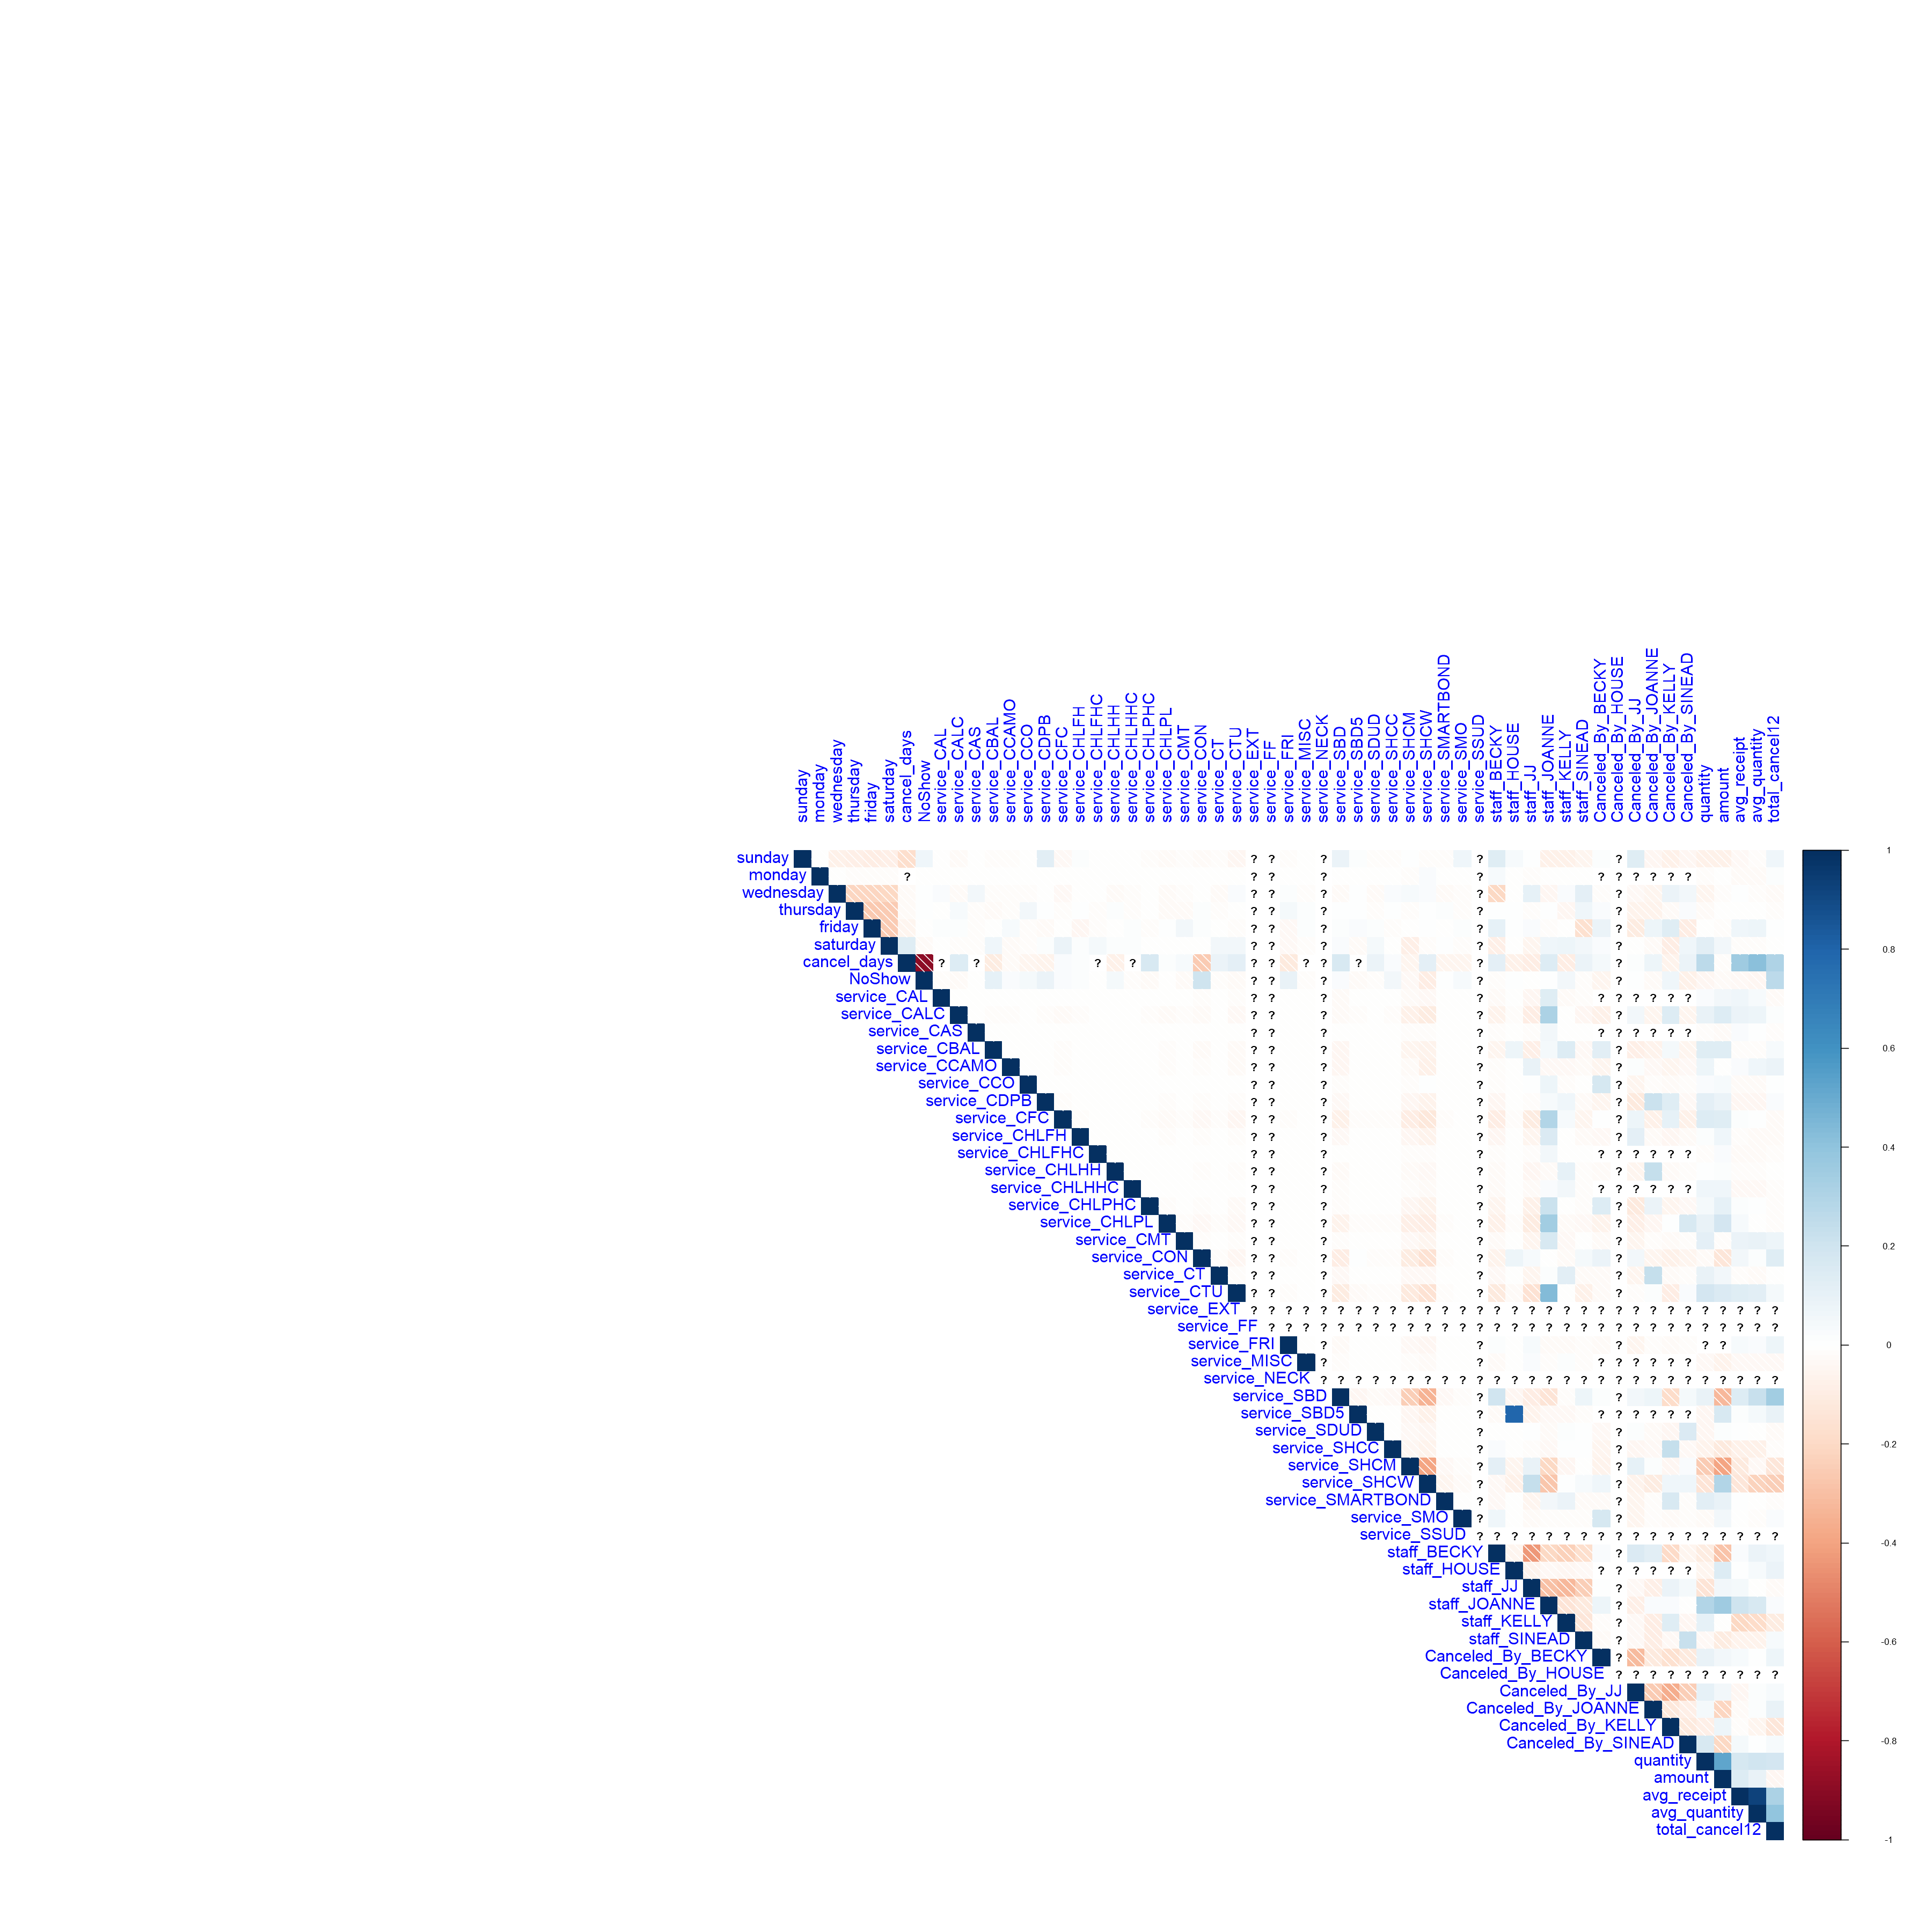

In [78]:
corrplot(res, method = "shade",type = "upper", is.corr = TRUE,tl.cex=1.5,tl.col = "Blue", tl.srt = 90, na.rm = TRUE)
options(repr.plot.width = 20, repr.plot.height = 20)


## Outliers

In [172]:
outlierMatrix <- function(data,threshold=1.5) {
    vn <- setdiff(names(data),"Client_Code")
    outdata <- data.frame(Client_Code=data$Client_Code)
    for(v in vn) {
        if(is.numeric(data[[v]])) {
            med <- median (data[[v]],na.rm=TRUE)
            outlow <- quantile(data[[v]],probs = 0.25,na.rm = T) 
            outhigh <- quantile(data[[v]],probs = 0.75, na.rm = T)
            irq_level <- (outhigh - outlow) * threshold
            outlow <- outlow - irq_level
            outhigh <- outhigh +  irq_level
            mv <- ifelse(data[[v]] < outlow | data[[v]] > outhigh, 1, 0)
            outdata[paste0(v,"_out")] <- mv
        } else {
            mv <- rep(0,nrow(data))
        }
    }
    outdata$row1 <- NULL
    return(outdata)
}

df_outliers <- outlierMatrix(df)

In [22]:
## Using IRQ for catching univariate outliers (1.5 x IRQ) 1==Outliers
head(outlierMatrix(df,threshold=1.5))

,Client_Code,sunday_out,monday_out,wednesday_out,thursday_out,friday_out,saturday_out,cancel_days_out,NoShow_out,service_CAL_out,...,Canceled_By_HOUSE_out,Canceled_By_JJ_out,Canceled_By_JOANNE_out,Canceled_By_KELLY_out,Canceled_By_SINEAD_out,quantity_out,amount_out,avg_receipt_out,avg_quantity_out,total_cancel12_out
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,NA,0,0,0,0,1,0,0,1,0,...,NA,NA,NA,NA,NA,NA,NA,0,0,0
2,NA,0,0,0,0,1,0,NA,0,0,...,NA,NA,NA,NA,NA,NA,NA,0,0,0
3,.L01,0,0,1,0,0,0,NA,0,0,...,NA,NA,NA,NA,NA,0,1,0,0,0
4,.L01,0,0,1,0,0,0,NA,0,0,...,NA,NA,NA,NA,NA,0,1,0,0,0
5,.L01,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,NA,NA,1,0,0
6,.L01,0,0,1,0,0,0,NA,0,0,...,NA,NA,NA,NA,NA,NA,NA,1,0,0


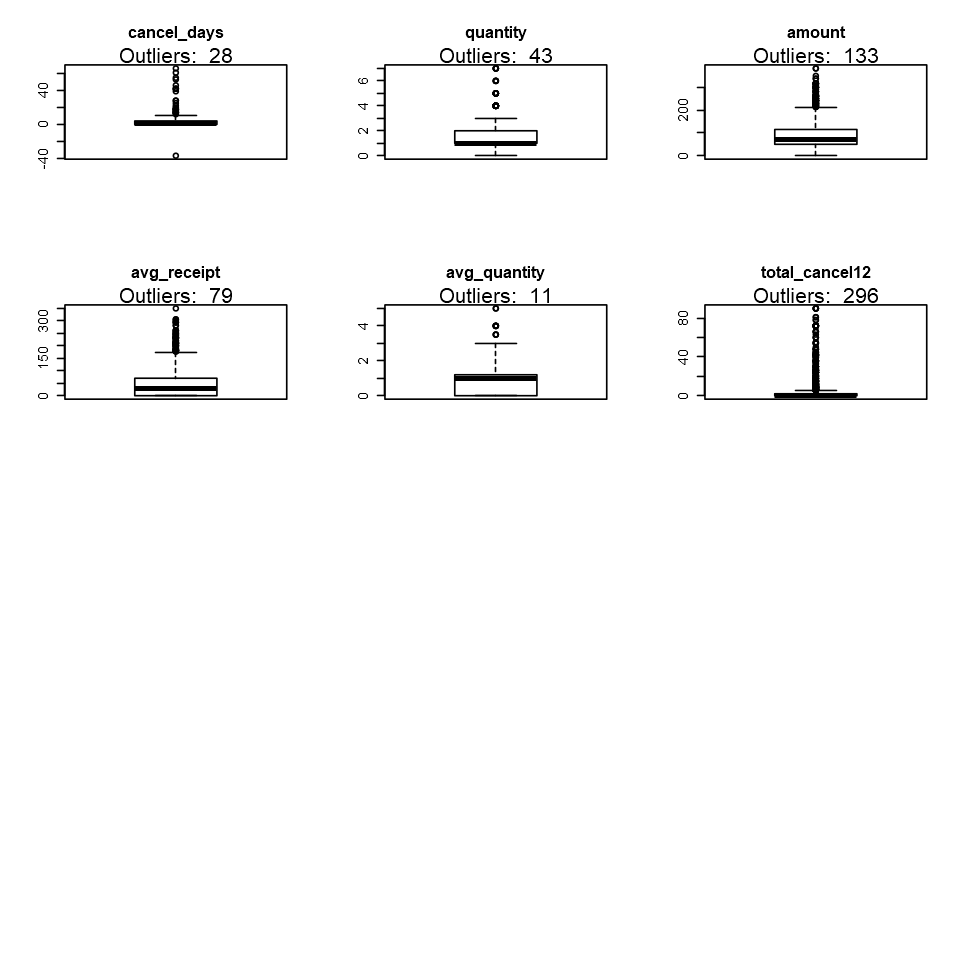

In [26]:
options(repr.plot.width = 8, repr.plot.height = 8)
par(mfrow=c(4,3))
for(v in names(NOSHOW_continuousV[,1:6])) {
    outlier_values <- boxplot.stats(NOSHOW_continuousV[,v])$out
    boxplot(df[[v]],main=v)
    mtext(paste("Outliers: ", paste(length(outlier_values), collapse=", ")), cex=1)
}
par(mfrow=c(1,1))

## Missingness

In [94]:
getMissingness(df)

list(var = c(50, 51, 52, 53, 54, 55, 10, 56, 57, 9), na_count = c(1967, 1967, 1967, 1967, 1967, 1967, 1909, 470, 470, 276), rate = c(90.1, 90.1, 90.1, 90.1, 90.1, 90.1, 87.4, 21.5, 21.5, 12.6))This dataset has 0 (0%) complete rows. Original data has 2184 rows.



var,na_count,rate
<fct>,<dbl>,<dbl>
Canceled_By_BECKY,1967,90.1
Canceled_By_HOUSE,1967,90.1
Canceled_By_JJ,1967,90.1
Canceled_By_JOANNE,1967,90.1
Canceled_By_KELLY,1967,90.1
Canceled_By_SINEAD,1967,90.1
cancel_days,1909,87.4
quantity,470,21.5
amount,470,21.5


In [98]:
missingMatrix <- function(data) {
    vn <- setdiff(names(data),"Client_Code")
    missdata <- data.frame(Client_Code=data$Client_Code)
    for(v in vn) {
        mv <- ifelse(is.na(data[[v]]),1,0)
        missdata[v] <- mv
    }
    missdata$row1 <- NULL
    return(missdata)
}
df_missing <- missingMatrix(data=df)
head(df_missing)

,Client_Code,Booking_Date,sunday,monday,wednesday,thursday,friday,saturday,time_booked,cancel_days,...,Canceled_By_HOUSE,Canceled_By_JJ,Canceled_By_JOANNE,Canceled_By_KELLY,Canceled_By_SINEAD,quantity,amount,avg_receipt,avg_quantity,total_cancel12
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,NA,0,0,0,0,0,0,0,1,0,...,1,1,1,1,1,1,1,0,0,0
2,NA,0,0,0,0,0,0,0,0,1,...,1,1,1,1,1,1,1,0,0,0
3,.L01,0,0,0,0,0,0,0,0,1,...,1,1,1,1,1,0,0,0,0,0
4,.L01,0,0,0,0,0,0,0,0,1,...,1,1,1,1,1,0,0,0,0,0
5,.L01,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
6,.L01,0,0,0,0,0,0,0,0,1,...,1,1,1,1,1,1,1,0,0,0


Warning message:
"`cols` is now required.
Please use `cols = c(data)`"


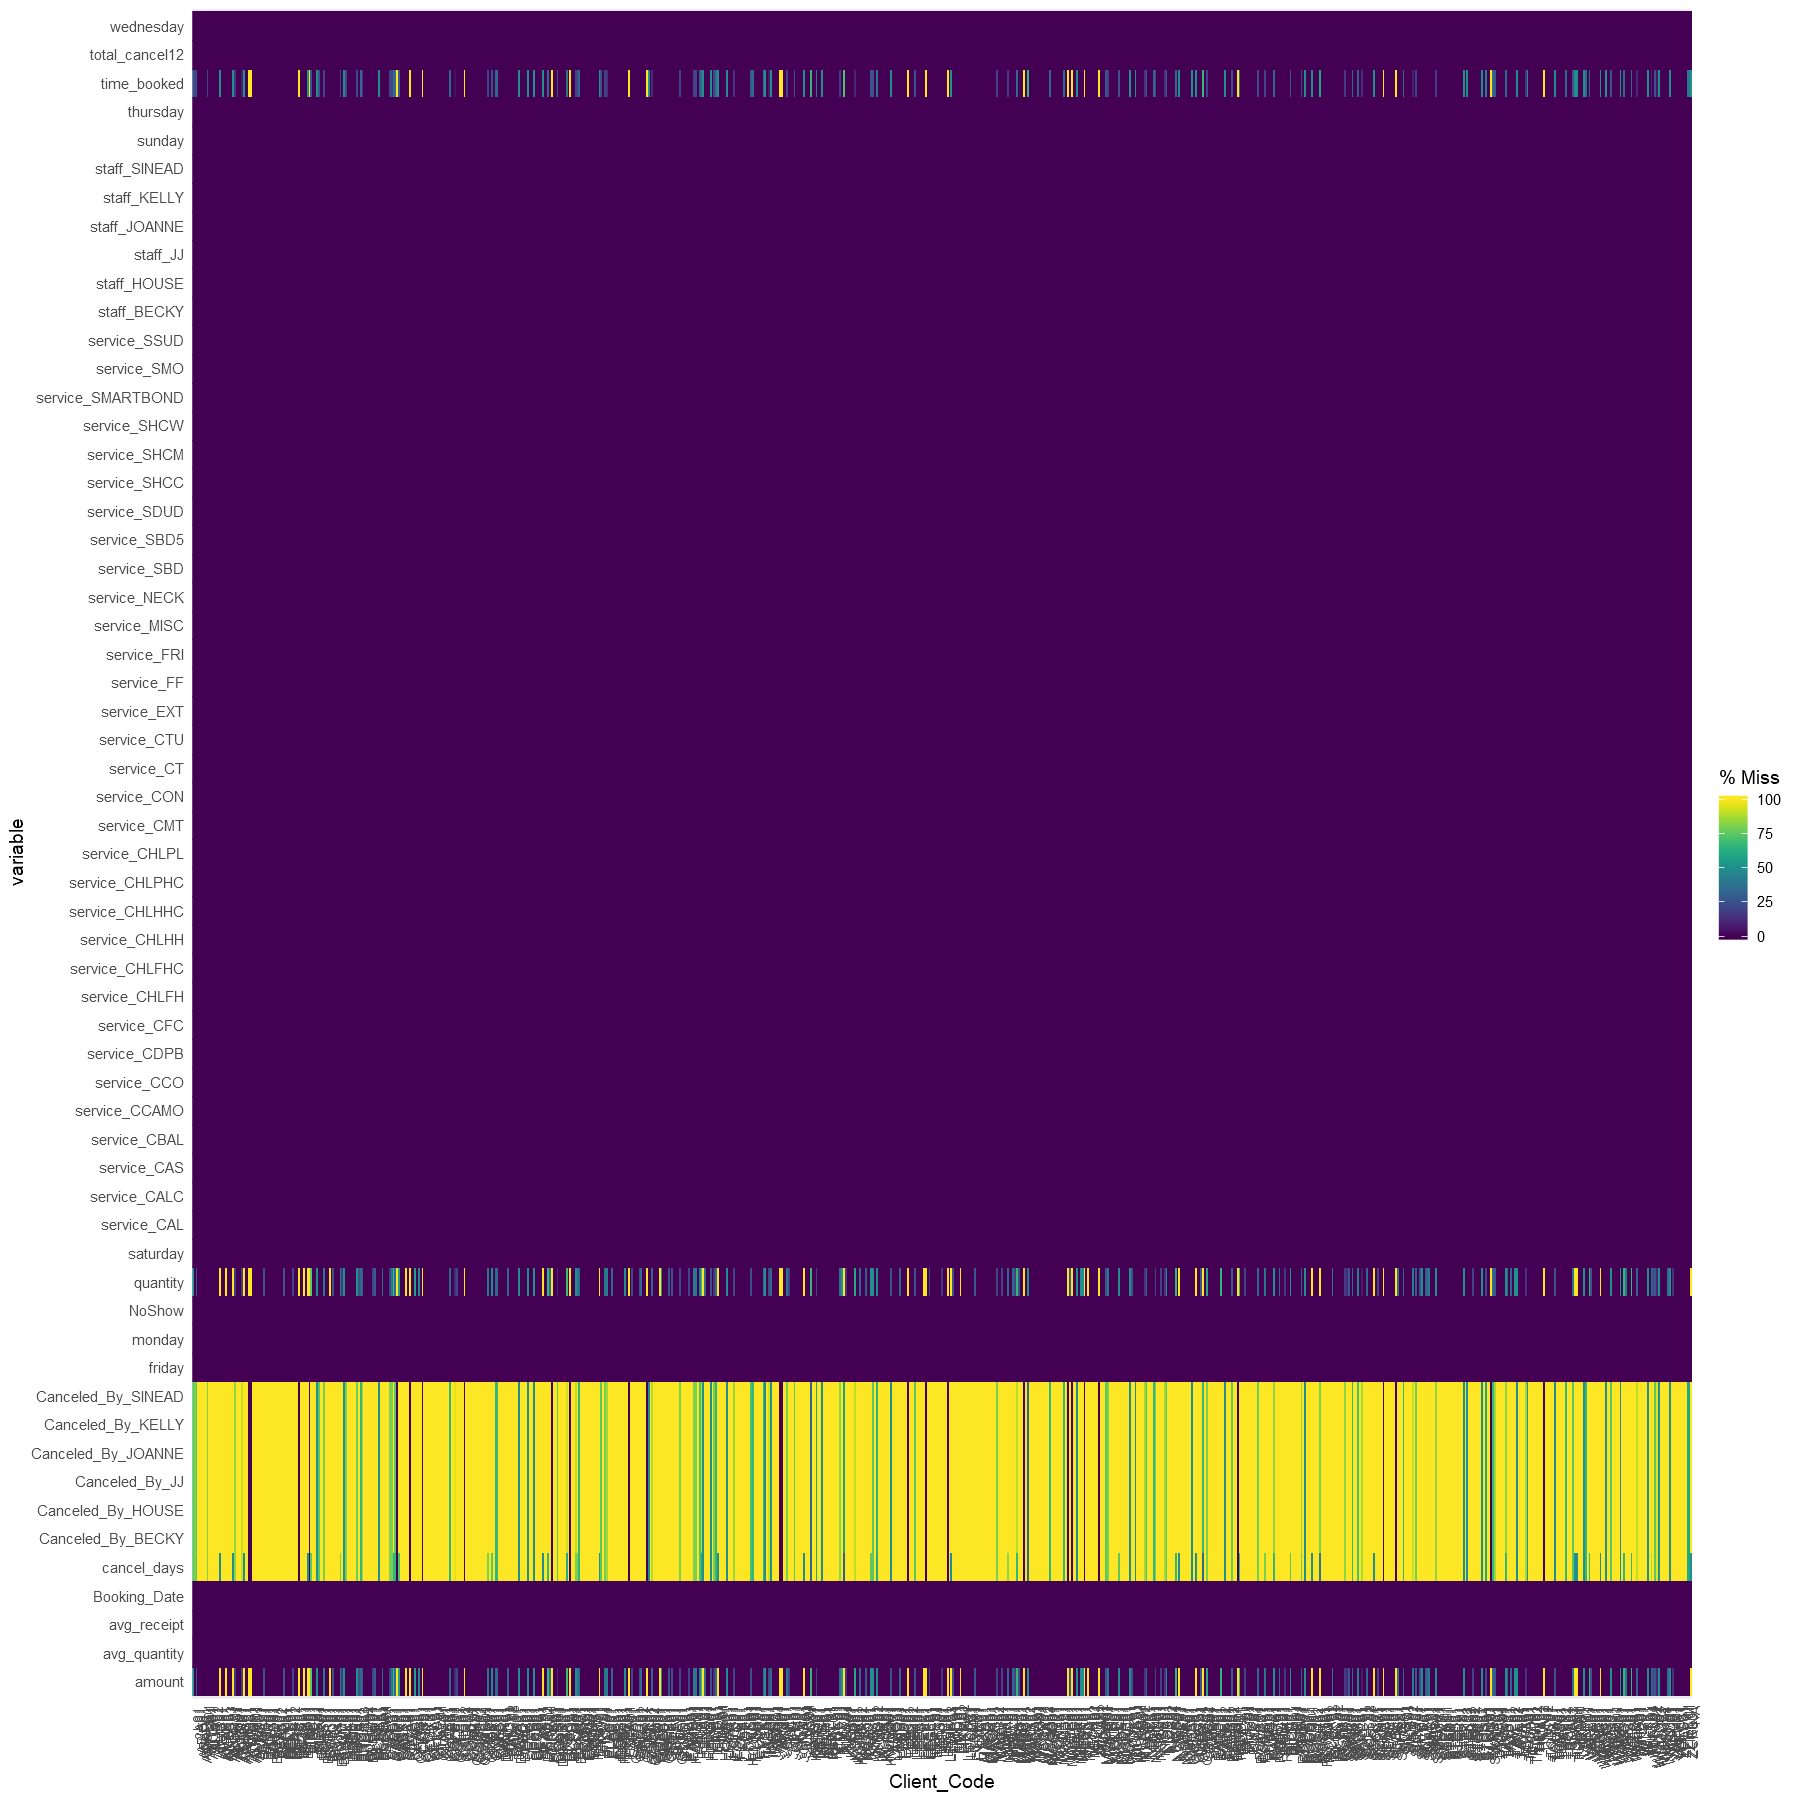

In [102]:
if(!require(naniar)) {install.packages("naniar");require(naniar)}
library(naniar)
options(repr.plot.width = 15, repr.plot.height = 15)

gg_miss_fct(x=df, fct=Client_Code) + 
theme(axis.text.x = element_text(angle=90, size=8))

# Data Cleansing

## Outliers

### For the variables where outliers were found, checking the distribution with/without outliers

#### cancel_days outliers

[1] 13 18 18 39 42 20

[1] -37

[1] 66

[1] 28

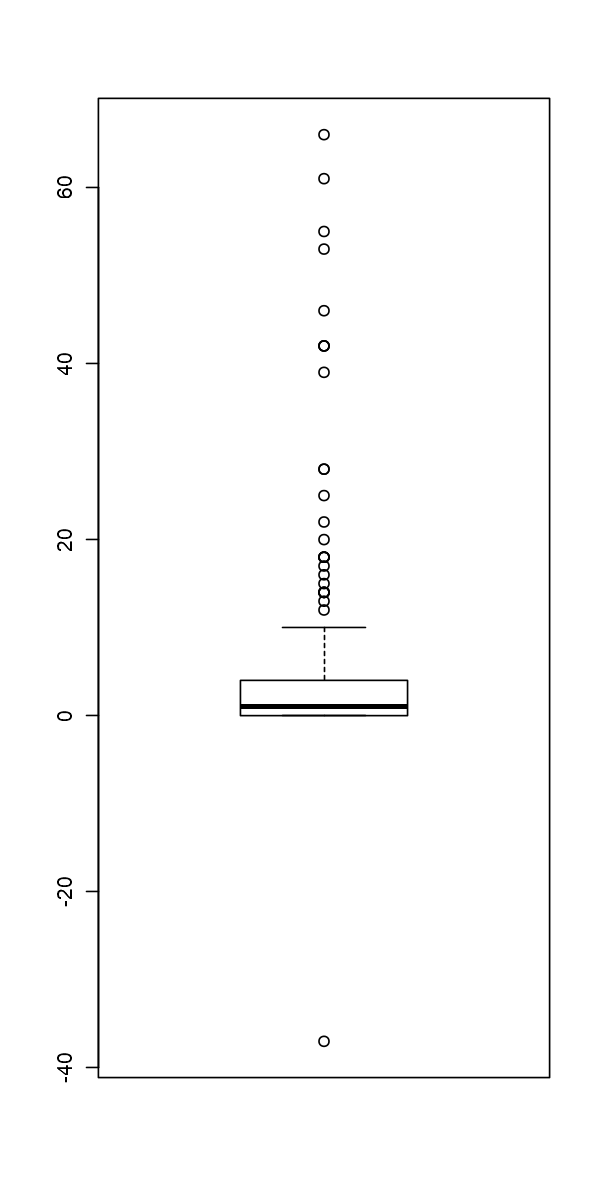

In [126]:
cancel_days_out  <- boxplot(df$cancel_days)
head(cancel_days_out$out) # outlier
min(cancel_days_out$out) #  minimum outlier
max(cancel_days_out$out)
length(cancel_days_out$out)

In [140]:
cancel_days.out <- ifelse(df[["cancel_days"]] > 11 | df[["cancel_days"]] < 0, 1, 0)
table(cancel_days.out)

cancel_days.out
  0   1 
247  28 

In [127]:
cancel_days.noout <- df[["cancel_days"]]
cancel_days.noout <- ifelse(cancel_days.out==1,NA,cancel_days.noout)
head(cancel_days.noout)

[1]  0 NA NA NA  5 NA

Warning message:
"Removed 1909 rows containing missing values (geom_point)."
Warning message:
"Removed 1937 rows containing missing values (geom_point)."


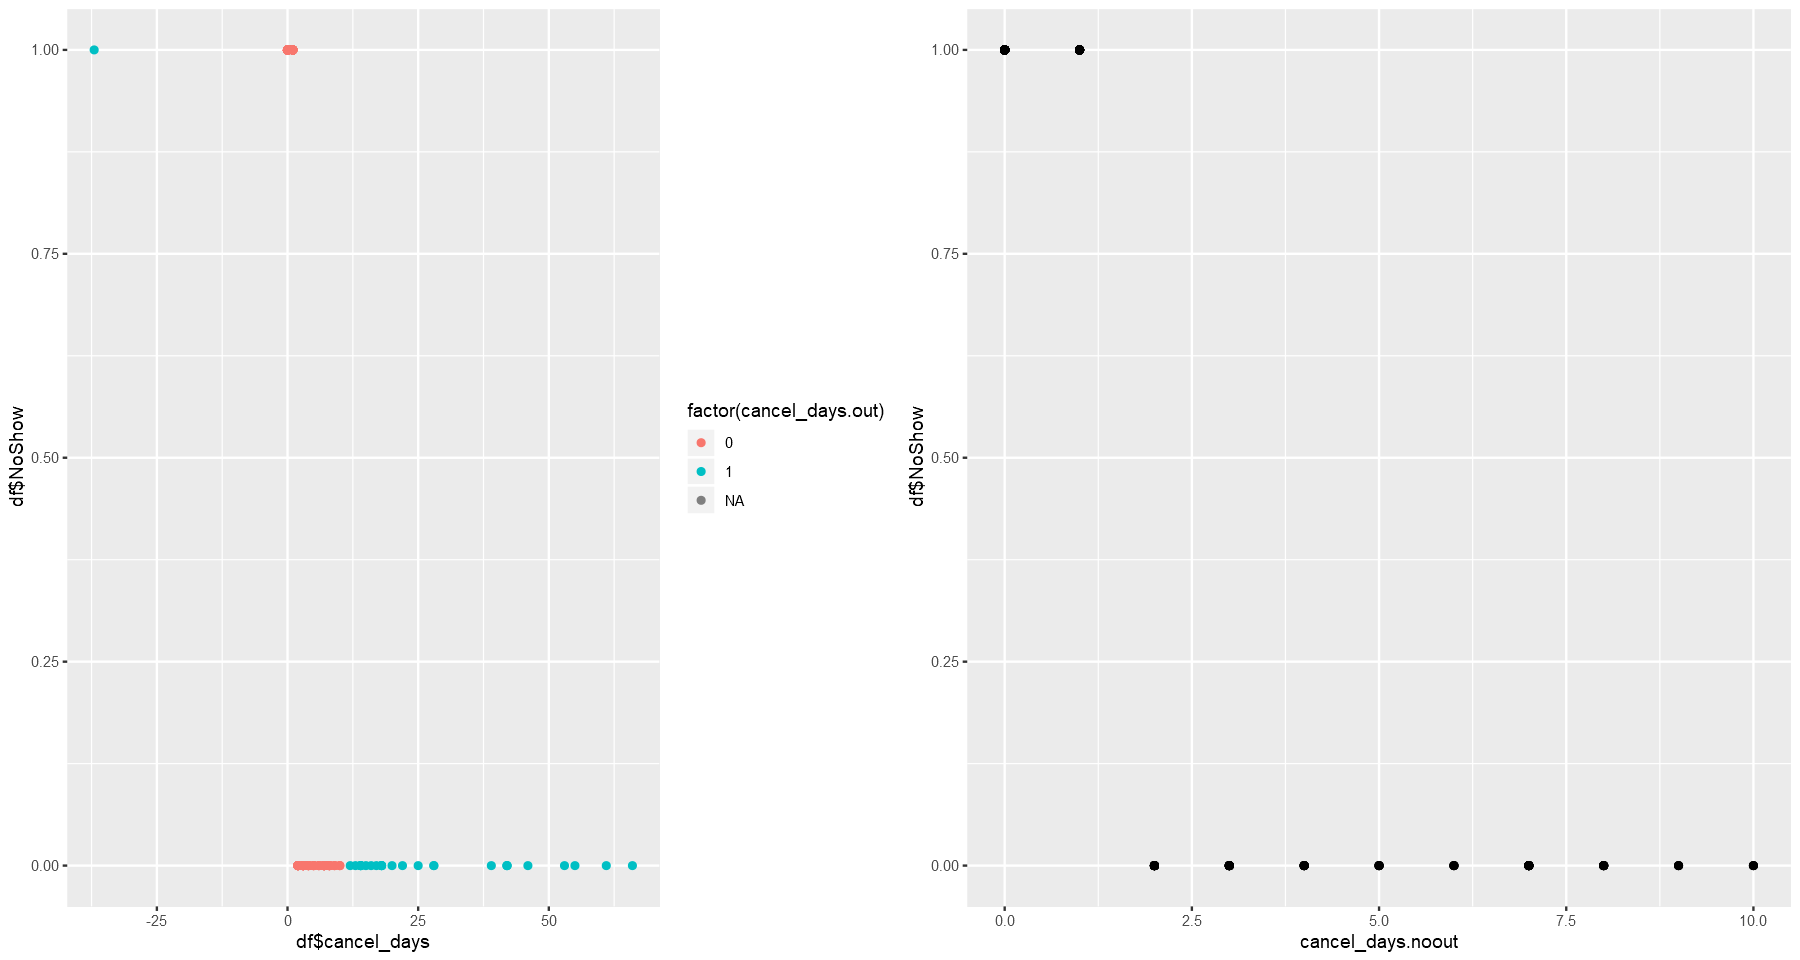

In [129]:
p1 <- ggplot() + geom_point(aes(x=df$cancel_days, y=df$NoShow, color=factor(cancel_days.out)))
p2 <- ggplot() + geom_point(aes(x=cancel_days.noout, y=df$NoShow))

options(repr.plot.width = 15, repr.plot.height = 8)
grid.arrange(p1, p2, nrow = 1)


In [130]:
t.test(cancel_days.out,cancel_days.noout)


	Welch Two Sample t-test

data:  cancel_days.out and cancel_days.noout
t = -9.4164, df = 251.95, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.903555 -1.245035
sample estimates:
mean of x mean of y 
0.1018182 1.6761134 


#### quantity outliers

[1] 4 4 4 4 4 4

[1] 4

[1] 7

[1] 43

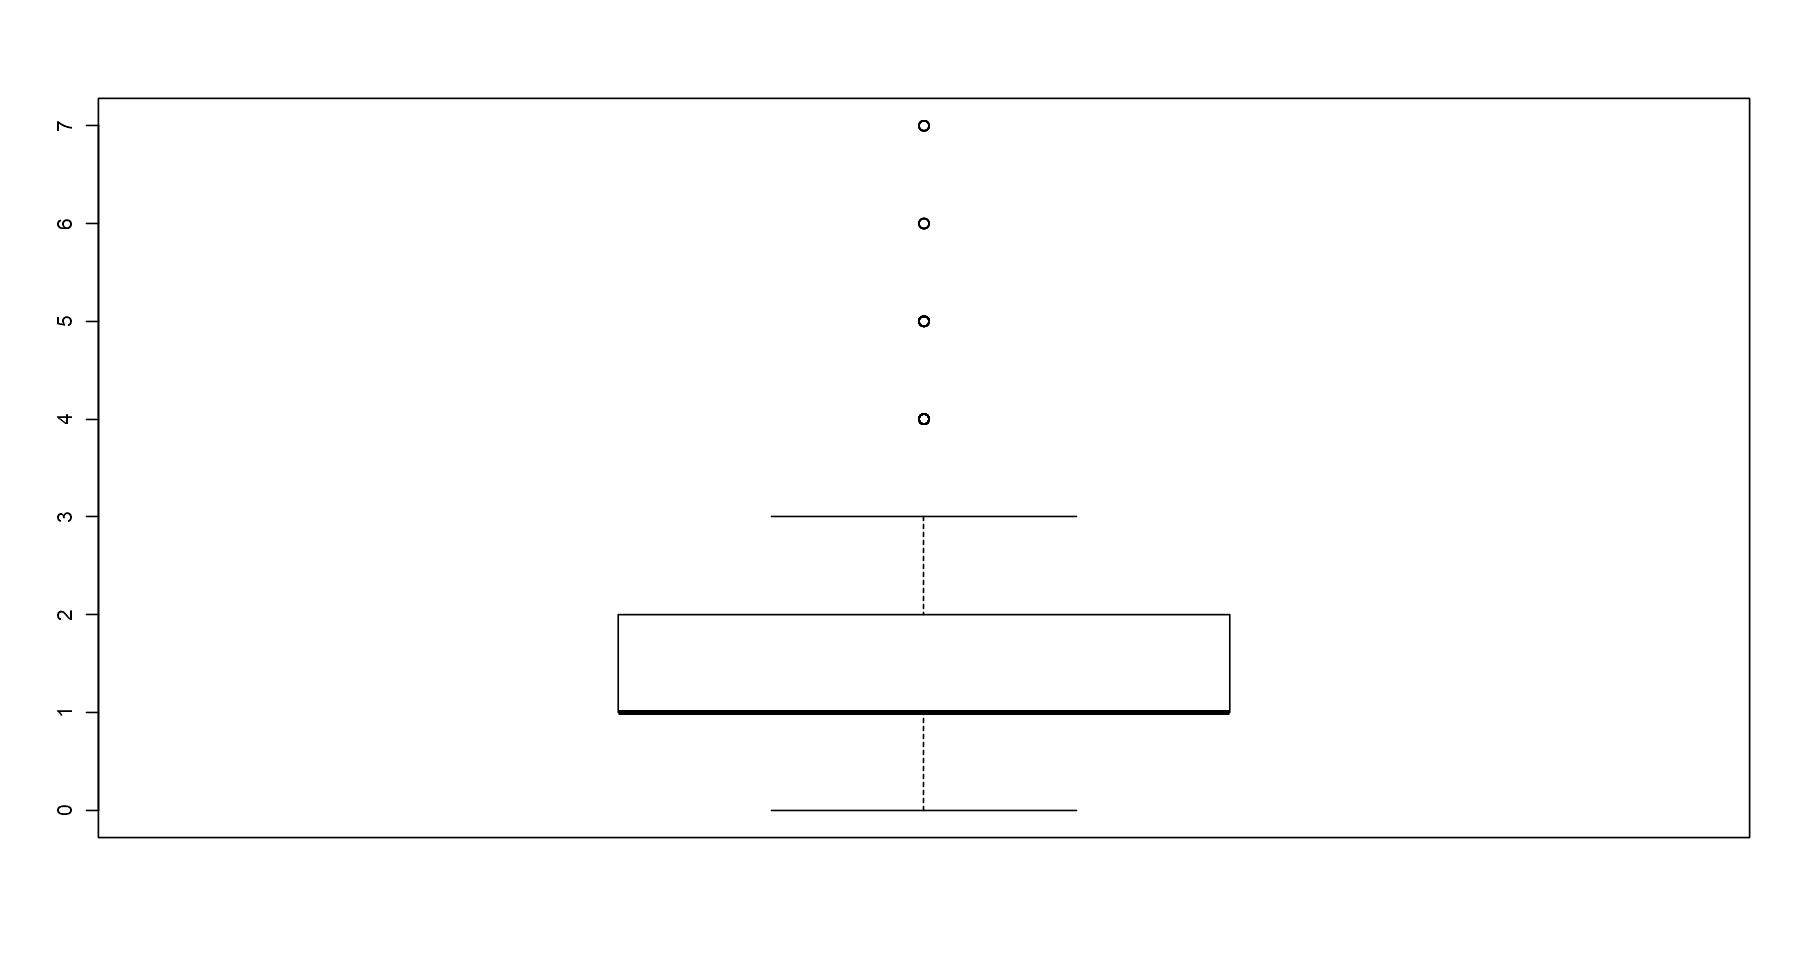

In [145]:
quantity_out  <- boxplot(df$quantity)
head(quantity_out$out) # outlier
min(quantity_out$out) #  minimum outlier
max(quantity_out$out)
length(quantity_out$out)

In [141]:
quantity.out <- ifelse(df[["quantity"]] >3 , 1, 0)
table(quantity.out)

quantity.out
   0    1 
1671   43 

In [142]:
quantity.noout <- df[["quantity"]]
quantity.noout <- ifelse(quantity.out==1,NA,quantity.noout)
head(quantity.noout)

[1] NA NA  2  2 NA NA

Warning message:
"Removed 470 rows containing missing values (geom_point)."
Warning message:
"Removed 513 rows containing missing values (geom_point)."


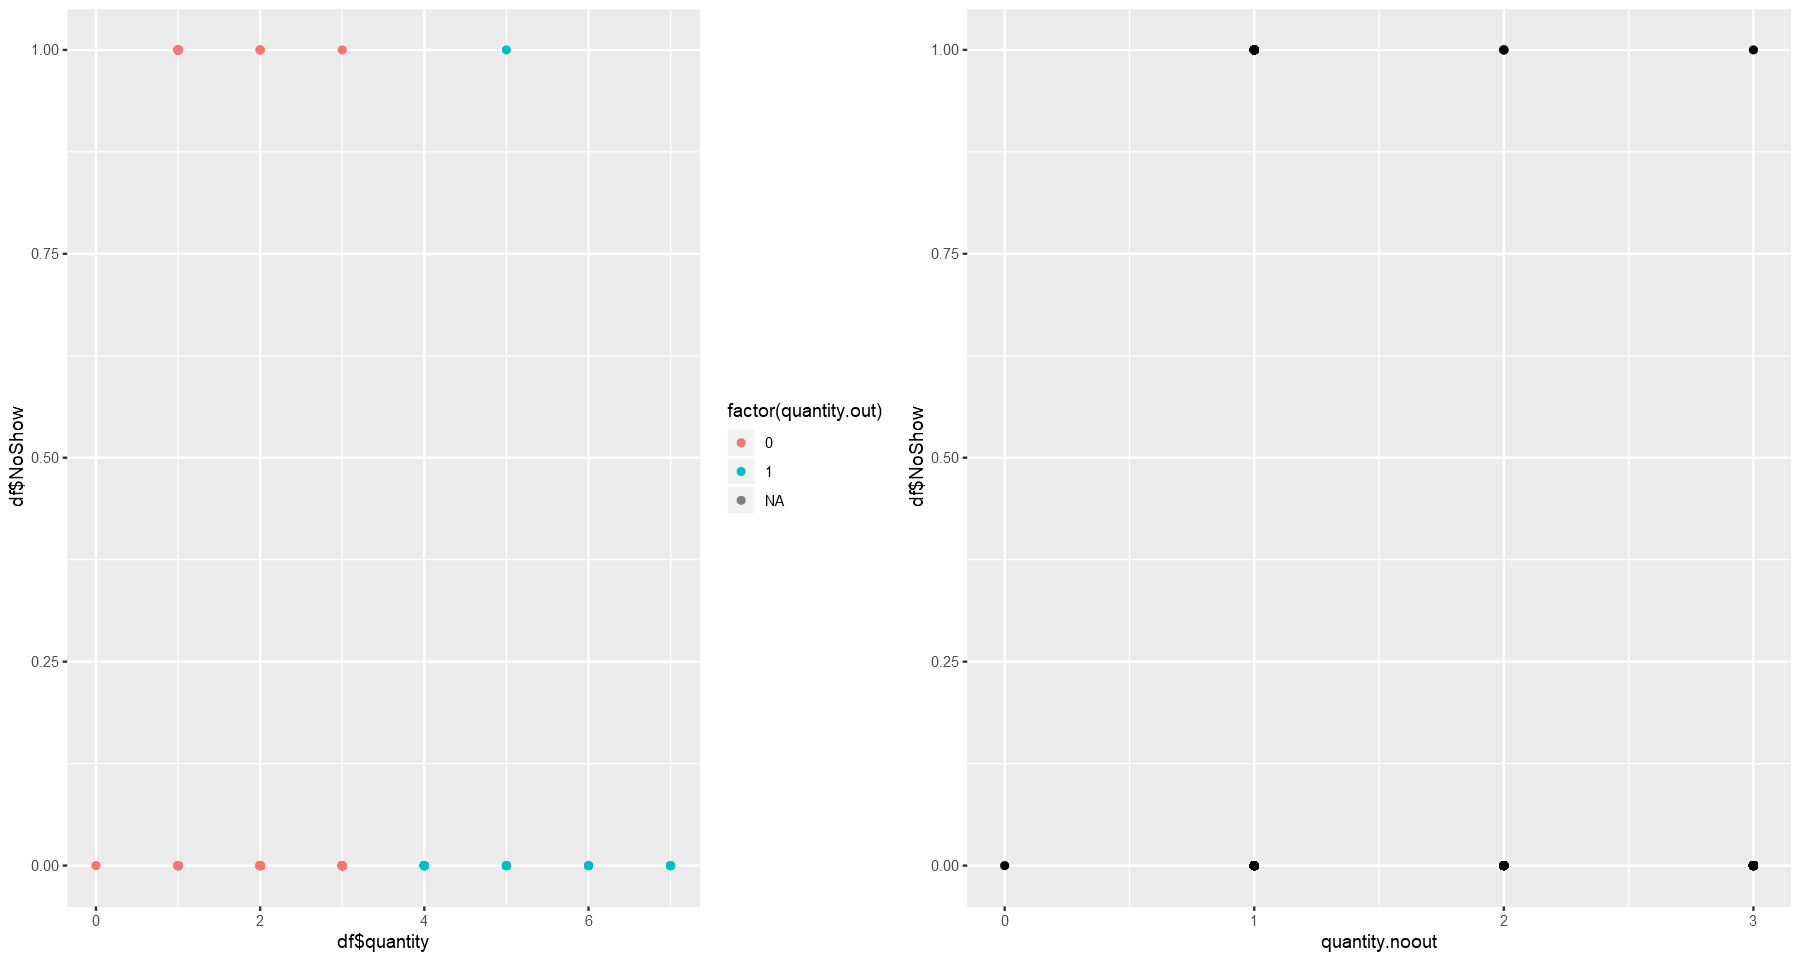

In [149]:
p1 <- ggplot() + geom_point(aes(x=df$quantity, y=df$NoShow, color=factor(quantity.out)))
p2 <- ggplot() + geom_point(aes(x=quantity.noout, y=df$NoShow))

options(repr.plot.width = 15, repr.plot.height = 8)
grid.arrange(p1, p2, nrow = 1)


In [144]:
t.test(quantity.out,quantity.noout)


	Welch Two Sample t-test

data:  quantity.out and quantity.noout
t = -90.442, df = 1891.5, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.397757 -1.338424
sample estimates:
 mean of x  mean of y 
0.02508751 1.39317774 


#### amount outliers

[1] 262 262 230 265 265 265

[1] 214.1

[1] 382.8

[1] 133

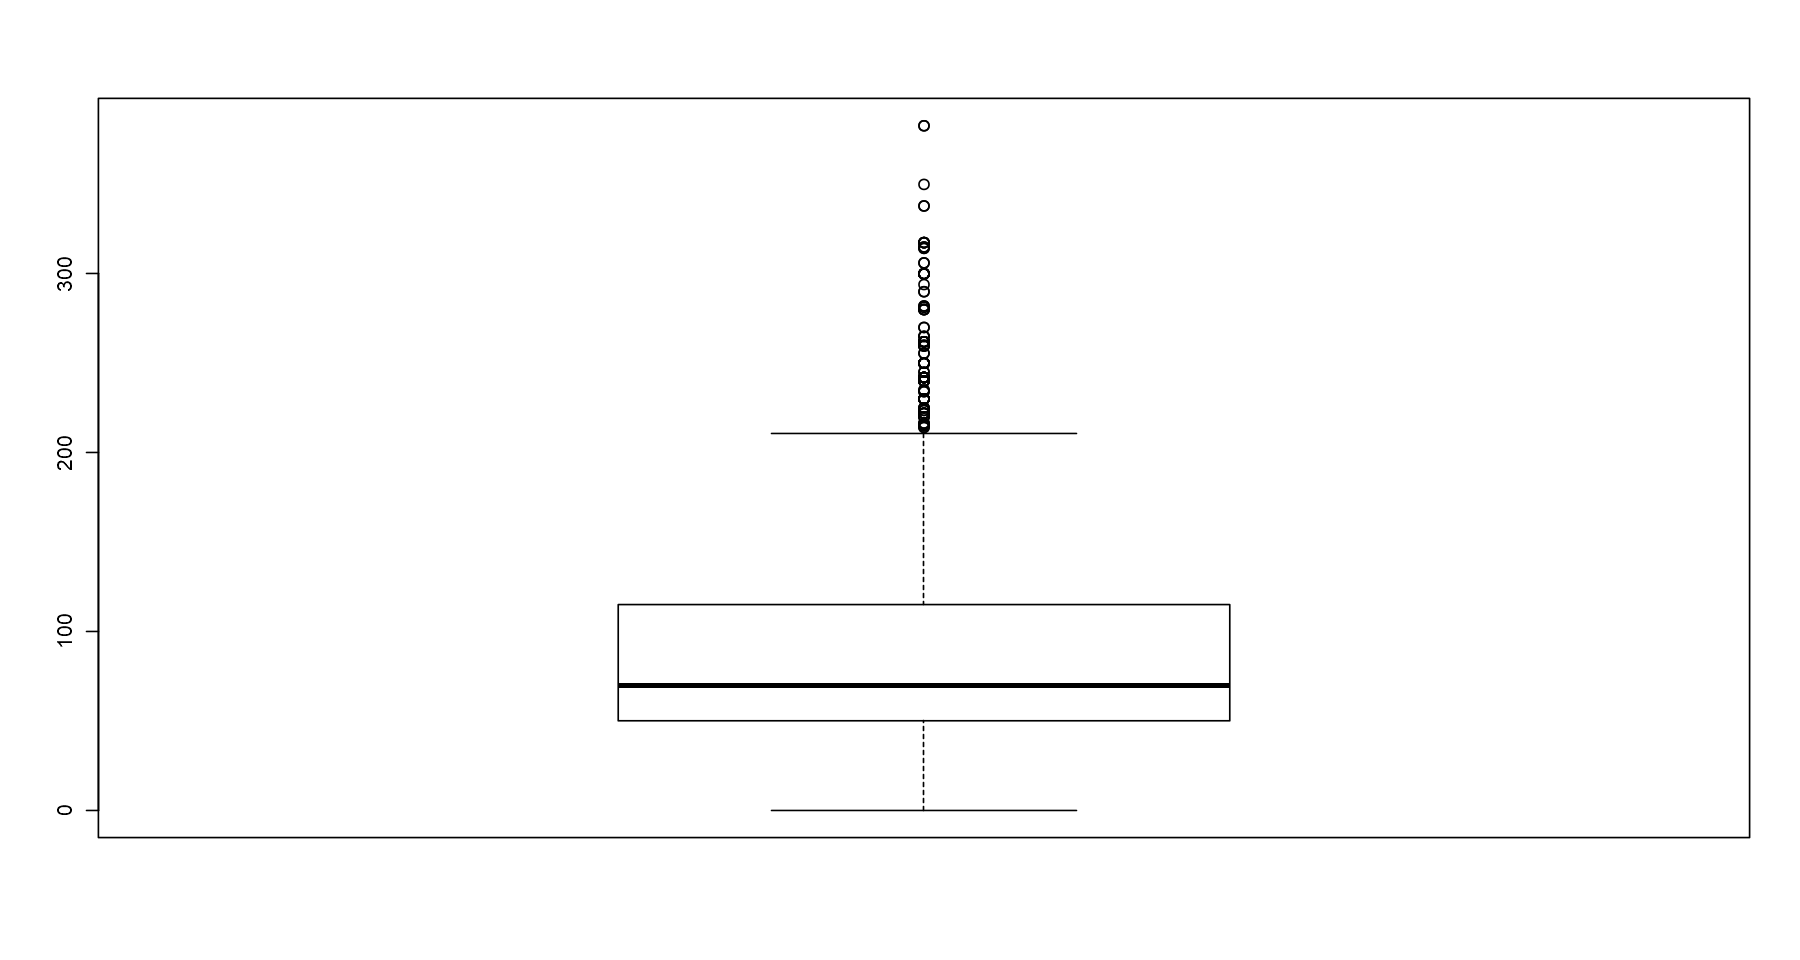

In [146]:
amount_out  <- boxplot(df$amount)
head(amount_out$out) # outlier
min(amount_out$out) #  minimum outlier
max(amount_out$out)
length(amount_out$out)

In [166]:
amount.out <- ifelse(df[["amount"]] >214 , 1, 0)
table(amount.out)

amount.out
   0    1 
1581  133 

In [148]:
amount.noout <- df[["amount"]]
amount.noout <- ifelse(amount.out==1,NA,amount.noout)
head(amount.noout)

[1] NA NA NA NA NA NA

Warning message:
"Removed 470 rows containing missing values (geom_point)."
Warning message:
"Removed 603 rows containing missing values (geom_point)."


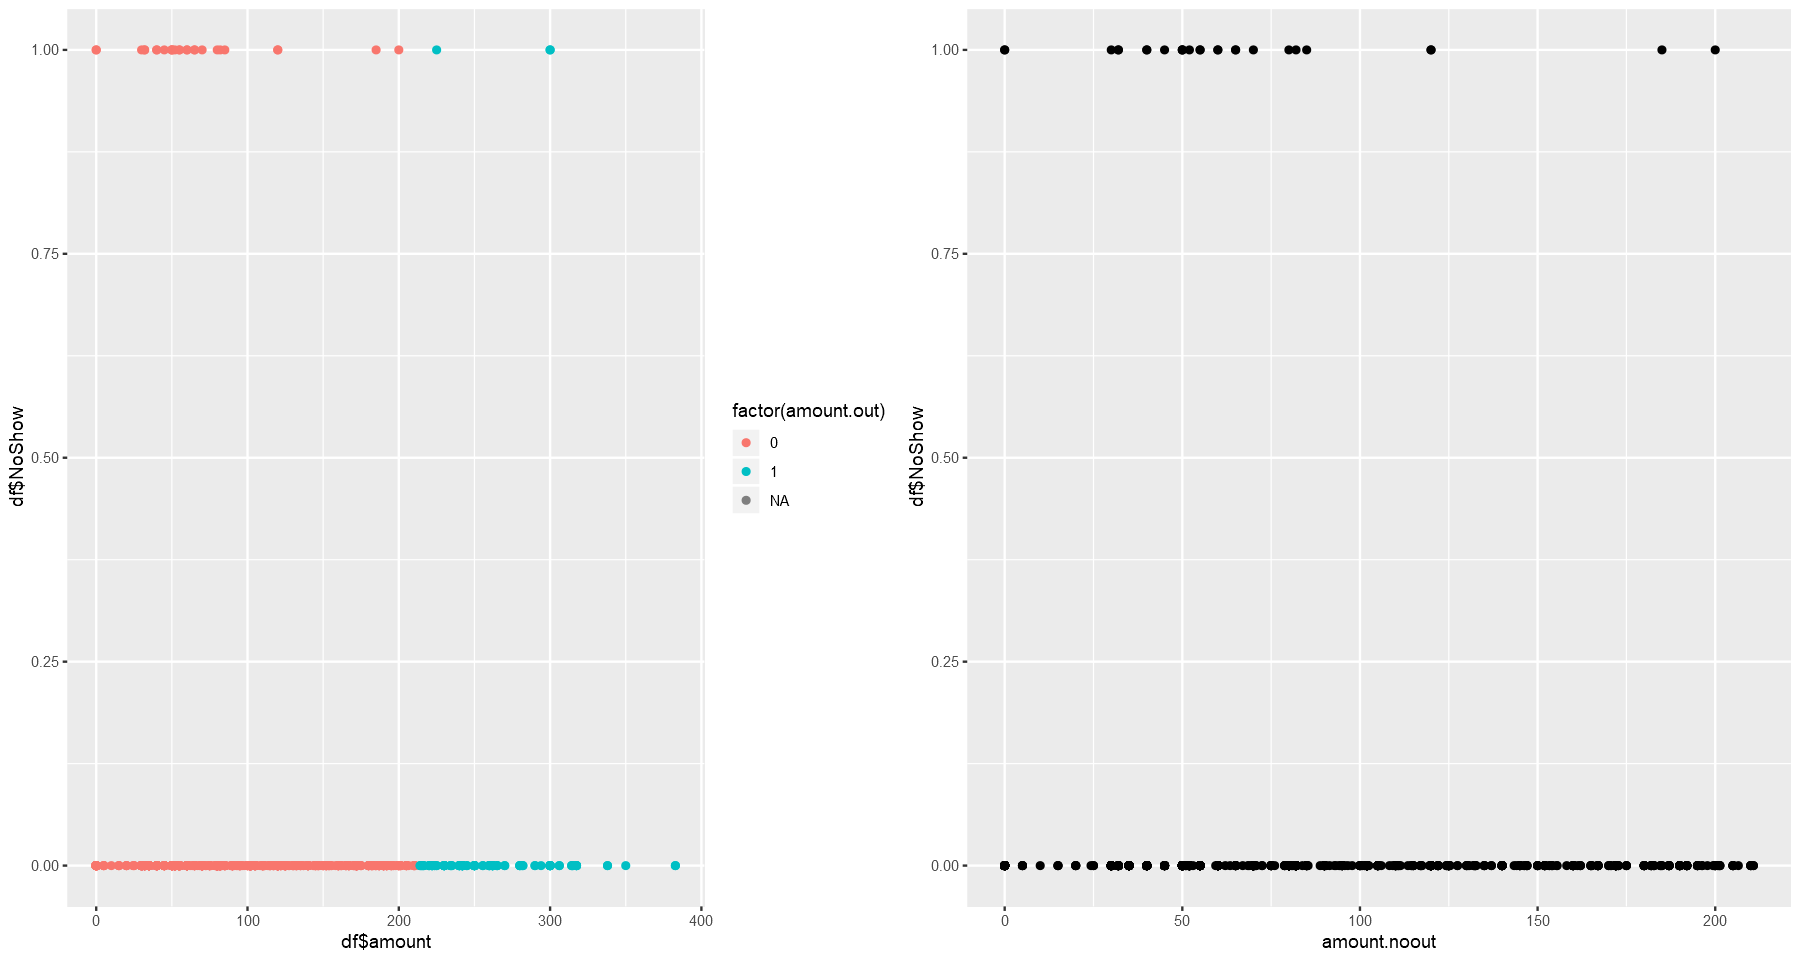

In [150]:
p1 <- ggplot() + geom_point(aes(x=df$amount, y=df$NoShow, color=factor(amount.out)))
p2 <- ggplot() + geom_point(aes(x=amount.noout, y=df$NoShow))

options(repr.plot.width = 15, repr.plot.height = 8)
grid.arrange(p1, p2, nrow = 1)


In [151]:
t.test(amount.out,amount.noout)


	Welch Two Sample t-test

data:  amount.out and amount.noout
t = -64.018, df = 1580.1, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -79.27204 -74.55877
sample estimates:
  mean of x   mean of y 
 0.07759627 76.99300443 


#### avg_receipt outliers

[1] 262.0 262.0 230.0 282.0 182.0 182.5

[1] 177.41

[1] 350

[1] 79

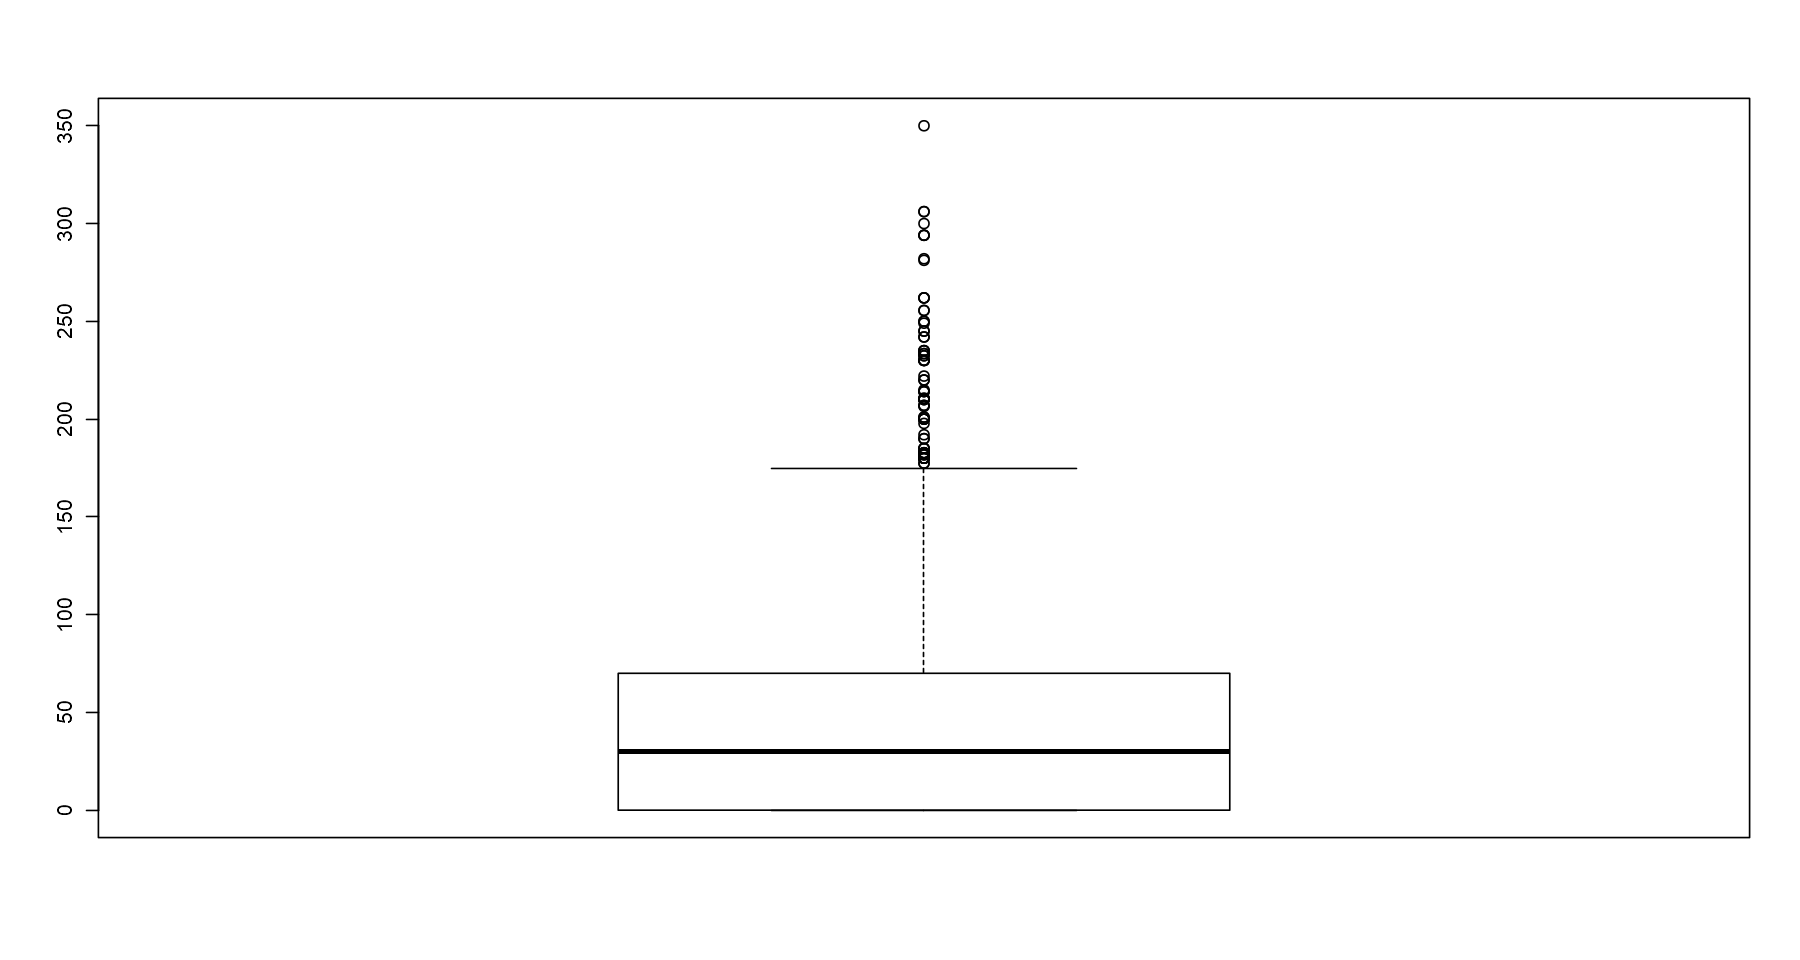

In [152]:
avg_receipt_out  <- boxplot(df$avg_receipt)
head(avg_receipt_out$out) # outlier
min(avg_receipt_out$out) #  minimum outlier
max(avg_receipt_out$out)
length(avg_receipt_out$out)

In [153]:
avg_receipt.out <- ifelse(df[["avg_receipt"]] >177 , 1, 0)
table(avg_receipt.out)

avg_receipt.out
   0    1 
2105   79 

In [154]:
avg_receipt.noout <- df[["avg_receipt"]]
avg_receipt.noout <- ifelse(avg_receipt.out==1,NA,avg_receipt.noout)
head(avg_receipt.noout)

[1]  0  0  0  0 NA NA

Warning message:
"Removed 79 rows containing missing values (geom_point)."


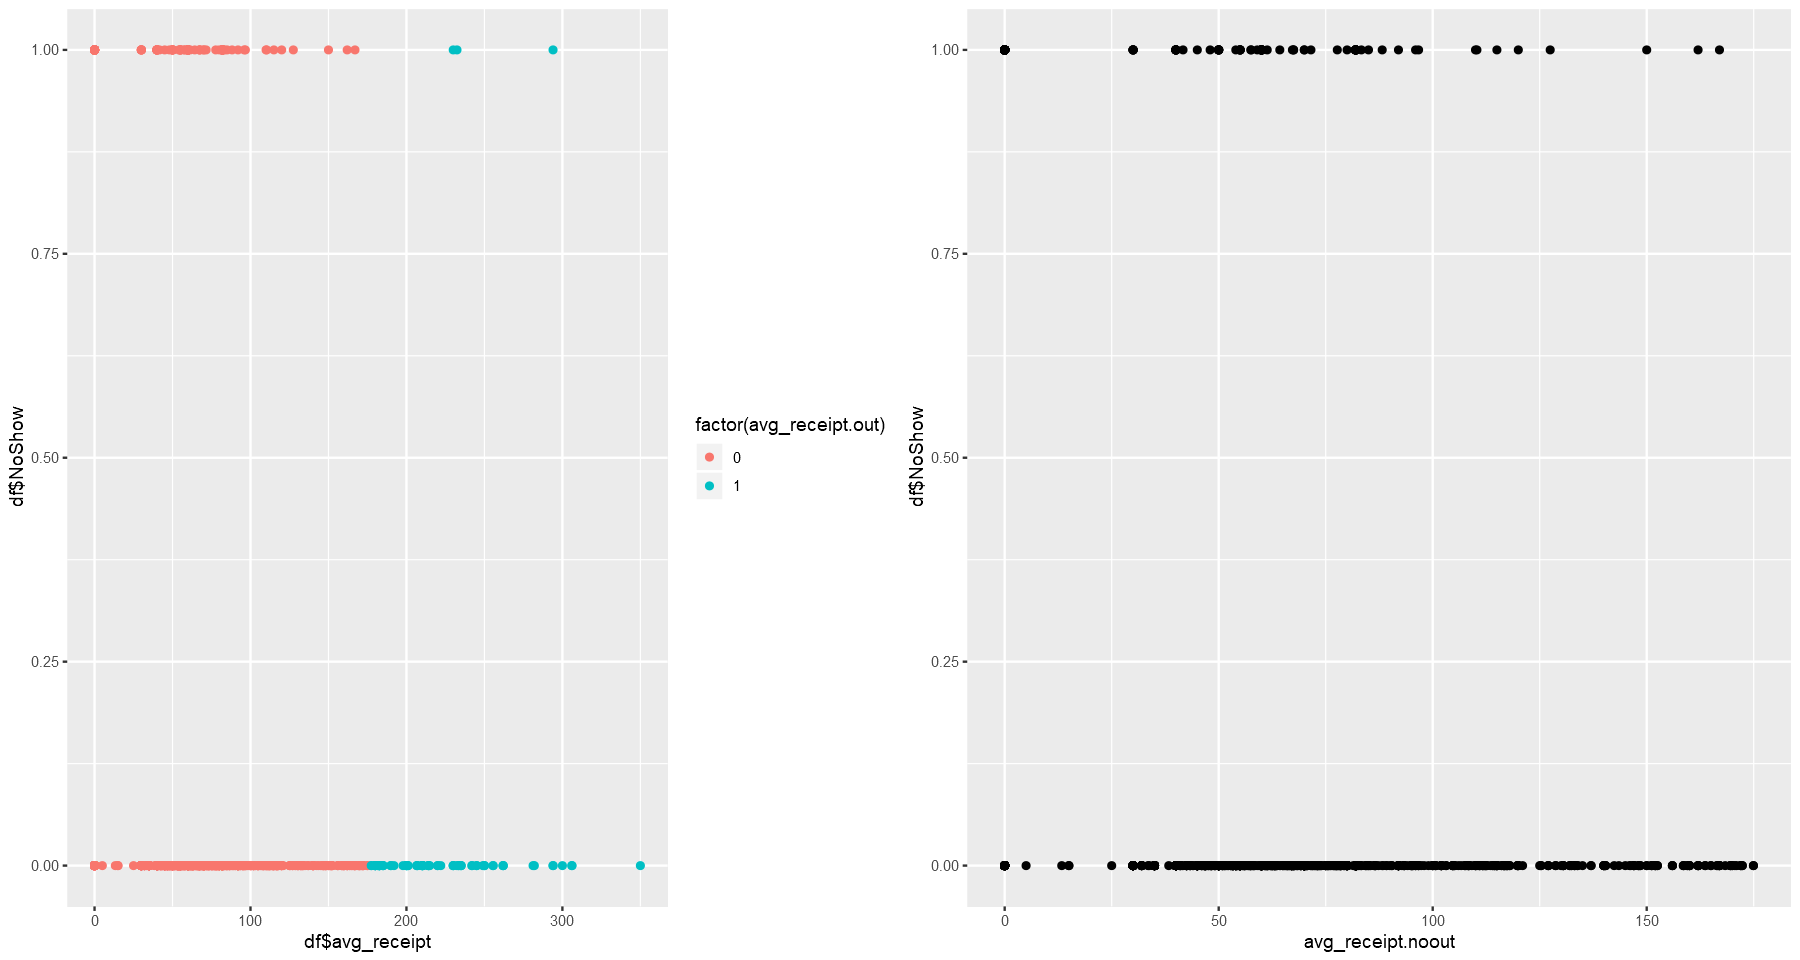

In [155]:
p1 <- ggplot() + geom_point(aes(x=df$avg_receipt, y=df$NoShow, color=factor(avg_receipt.out)))
p2 <- ggplot() + geom_point(aes(x=avg_receipt.noout, y=df$NoShow))

options(repr.plot.width = 15, repr.plot.height = 8)
grid.arrange(p1, p2, nrow = 1)


In [156]:
t.test(avg_receipt.out,avg_receipt.noout)


	Welch Two Sample t-test

data:  avg_receipt.out and avg_receipt.noout
t = -38.79, df = 2104.1, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -39.11203 -35.34758
sample estimates:
  mean of x   mean of y 
 0.03617216 37.26597711 


#### avg_quantity outliers

[1] 4.0 5.0 5.0 3.5 3.5 3.5

[1] 3.5

[1] 5

[1] 11

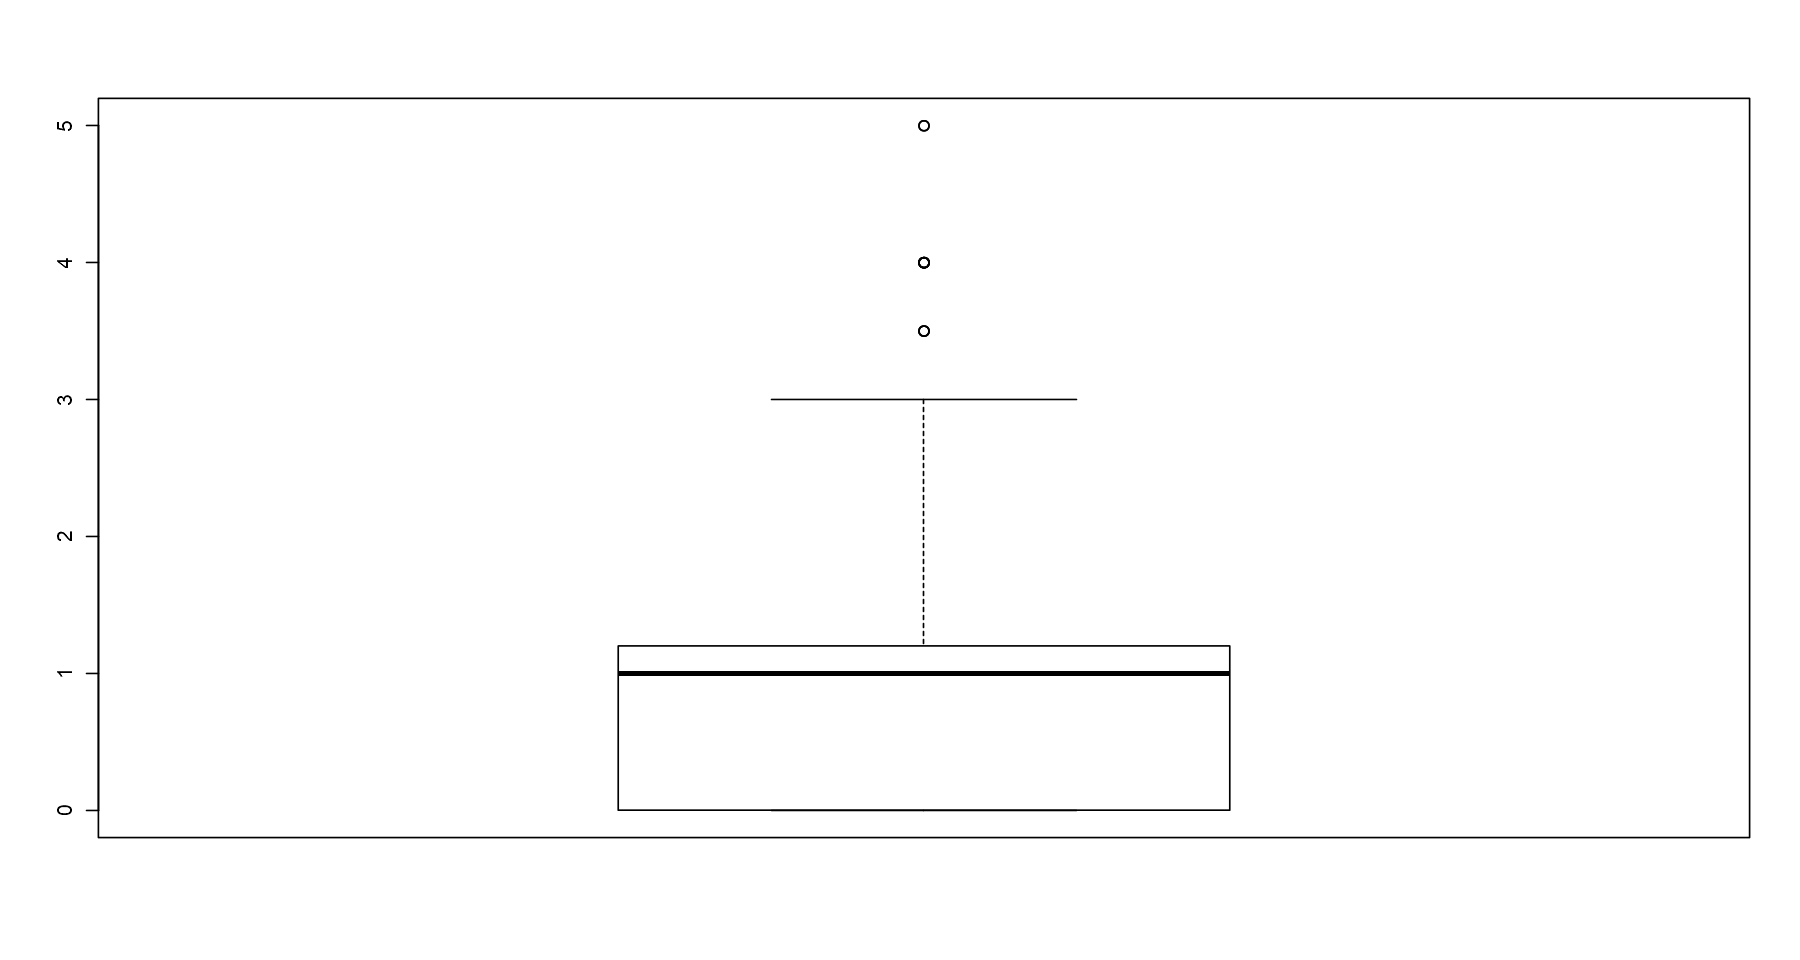

In [157]:
avg_quantity_out  <- boxplot(df$avg_quantity)
head(avg_quantity_out$out) # outlier
min(avg_quantity_out$out) #  minimum outlier
max(avg_quantity_out$out)
length(avg_quantity_out$out)

In [160]:
avg_quantity.out <- ifelse(df[["avg_quantity"]] >3.4 , 1, 0)
table(avg_quantity.out)

avg_quantity.out
   0    1 
2173   11 

In [161]:
avg_quantity.noout <- df[["avg_quantity"]]
avg_quantity.noout <- ifelse(avg_quantity.out==1,NA,avg_quantity.noout)
head(avg_quantity.noout)

[1] 0 0 0 0 2 2

Warning message:
"Removed 11 rows containing missing values (geom_point)."


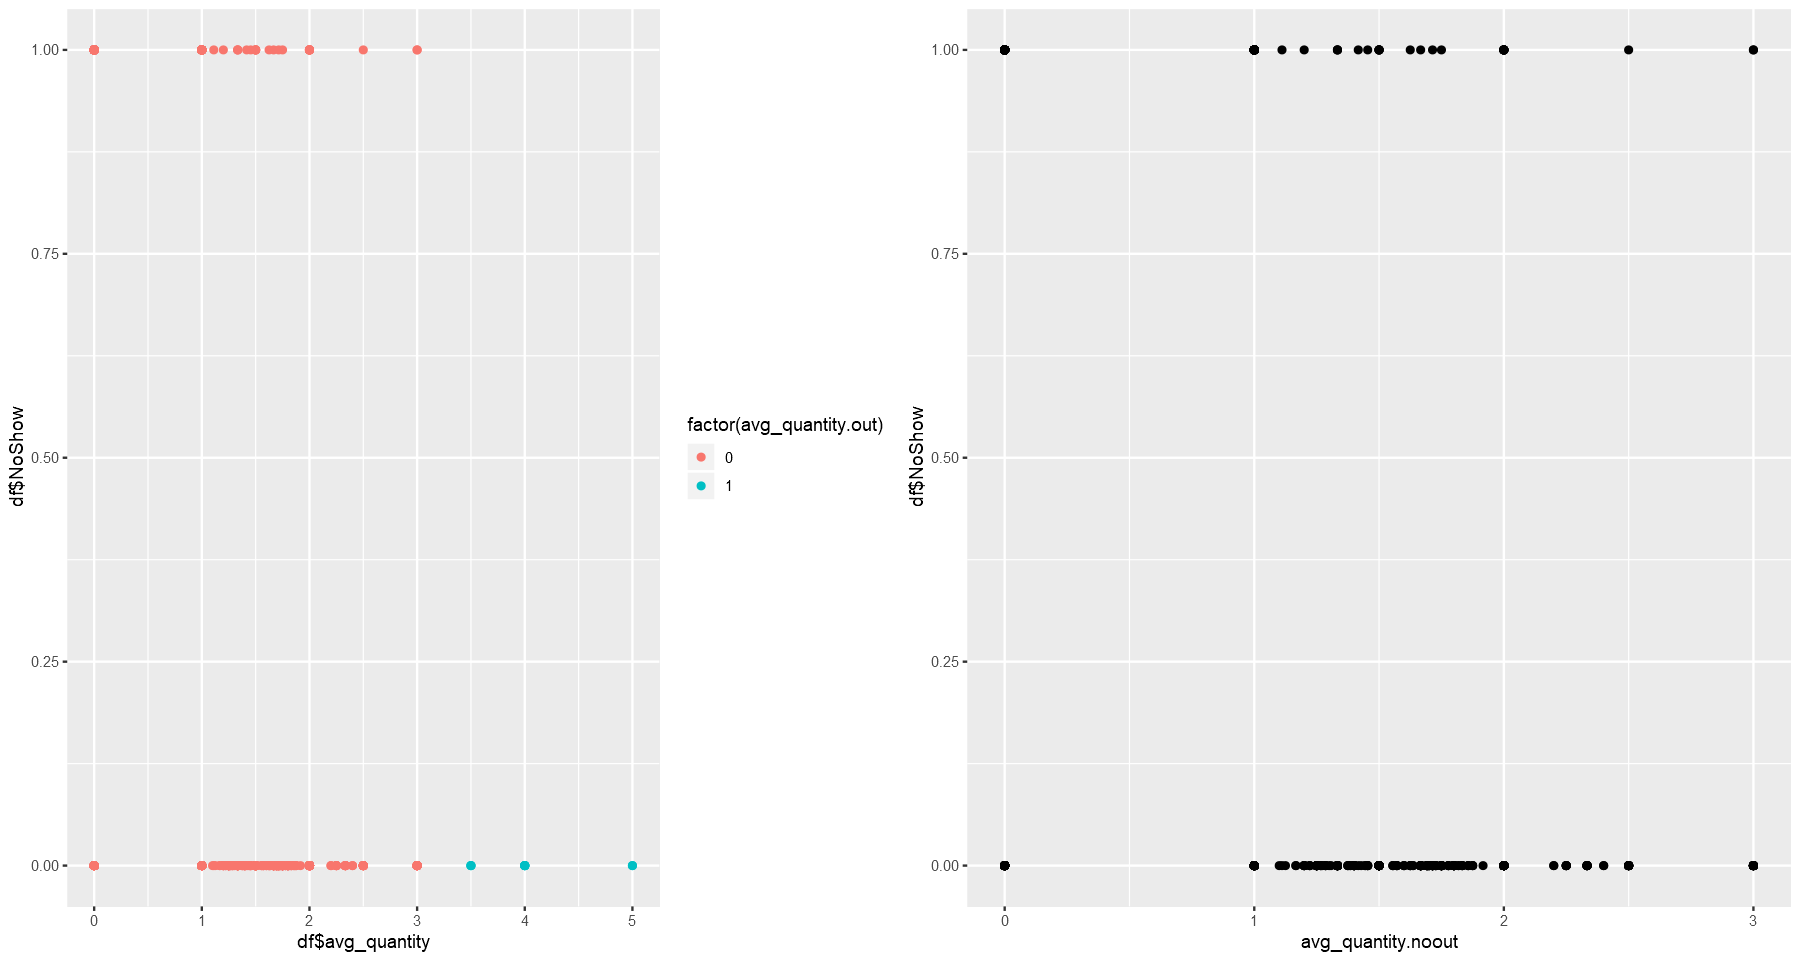

In [162]:
p1 <- ggplot() + geom_point(aes(x=df$avg_quantity, y=df$NoShow, color=factor(avg_quantity.out)))
p2 <- ggplot() + geom_point(aes(x=avg_quantity.noout, y=df$NoShow))

options(repr.plot.width = 15, repr.plot.height = 8)
grid.arrange(p1, p2, nrow = 1)


In [163]:
t.test(avg_quantity.out,avg_quantity.noout)


	Welch Two Sample t-test

data:  avg_quantity.out and avg_quantity.noout
t = -42.991, df = 2207.9, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.7527373 -0.6870609
sample estimates:
 mean of x  mean of y 
0.00503663 0.72493572 


#### total_cancel12 outliers

[1]  6  7  7  6  6 12

[1] 6

[1] 90

[1] 296

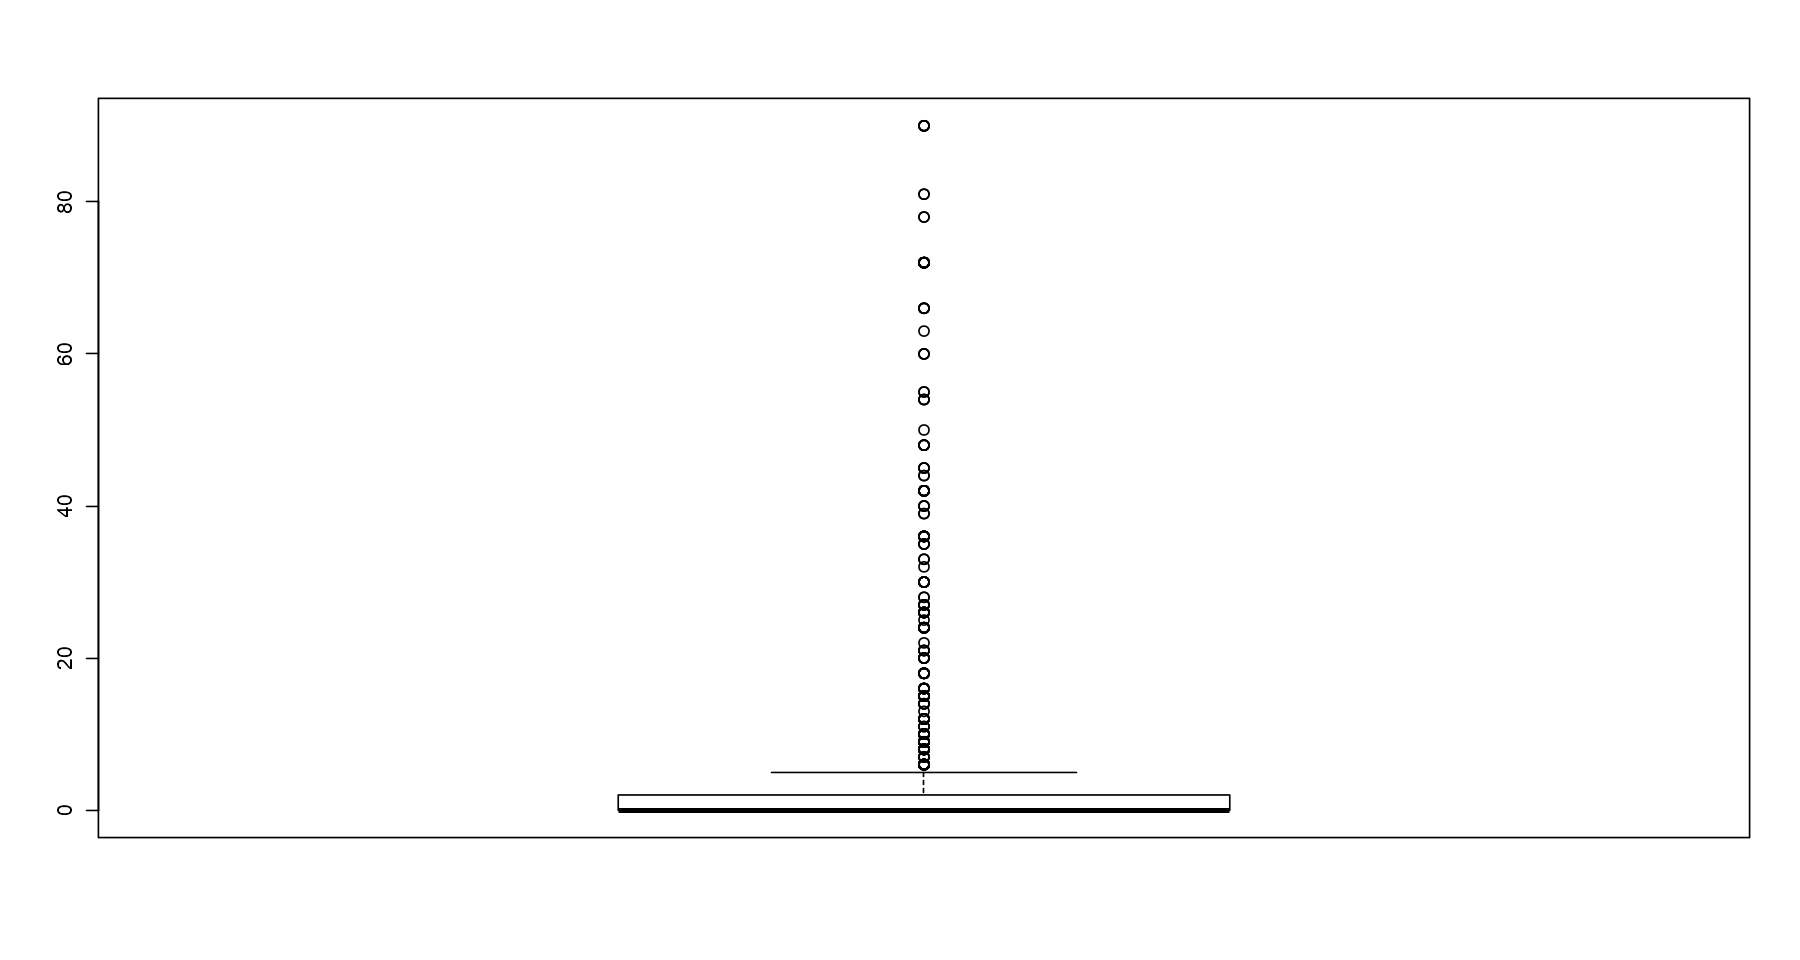

In [164]:
total_cancel12_out  <- boxplot(df$total_cancel12)
head(total_cancel12_out$out) # outlier
min(total_cancel12_out$out) #  minimum outlier
max(total_cancel12_out$out)
length(total_cancel12_out$out)

In [167]:
total_cancel12.out <- ifelse(df[["total_cancel12"]] >5 , 1, 0)
table(total_cancel12.out)

total_cancel12.out
   0    1 
1888  296 

In [168]:
total_cancel12.noout <- df[["total_cancel12"]]
total_cancel12.noout <- ifelse(total_cancel12.out==1,NA,total_cancel12.noout)
head(total_cancel12.noout)

[1] 0 0 1 1 1 1

Warning message:
"Removed 296 rows containing missing values (geom_point)."


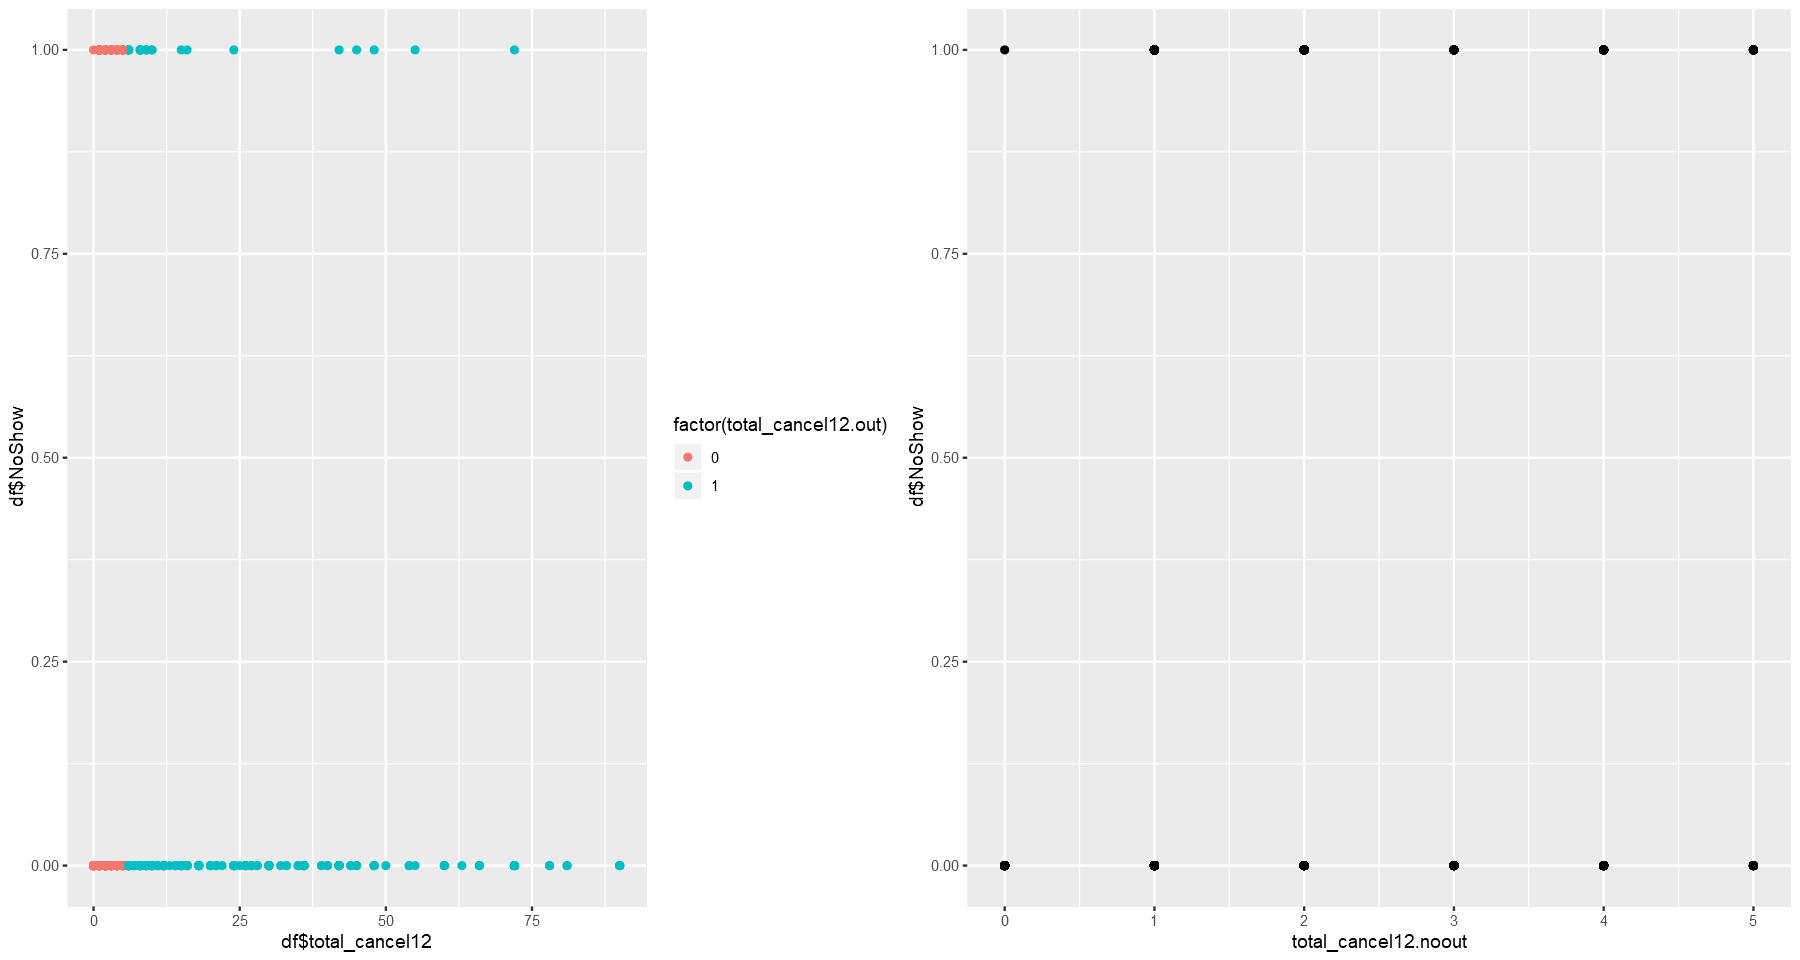

In [169]:
p1 <- ggplot() + geom_point(aes(x=df$total_cancel12, y=df$NoShow, color=factor(total_cancel12.out)))
p2 <- ggplot() + geom_point(aes(x=total_cancel12.noout, y=df$NoShow))

options(repr.plot.width = 15, repr.plot.height = 8)
grid.arrange(p1, p2, nrow = 1)


In [170]:
t.test(total_cancel12.out,total_cancel12.noout)


	Welch Two Sample t-test

data:  total_cancel12.out and total_cancel12.noout
t = -19.332, df = 2157.5, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.6032929 -0.4921702
sample estimates:
mean of x mean of y 
0.1355311 0.6832627 


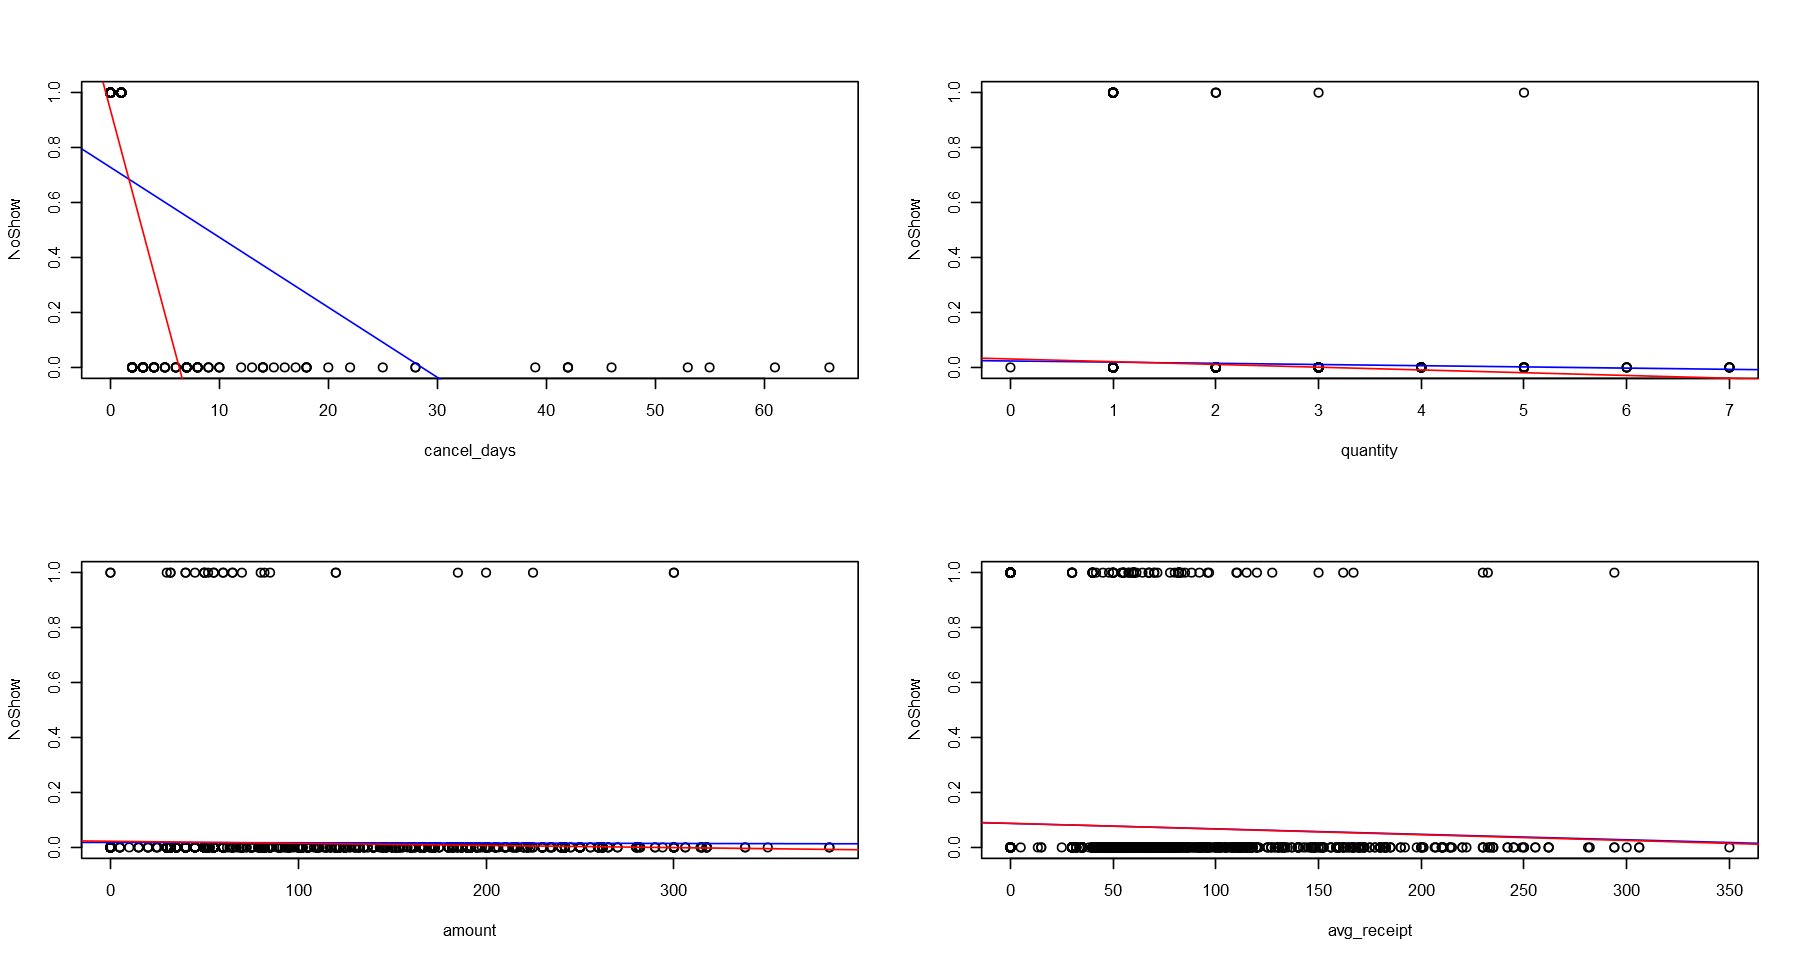

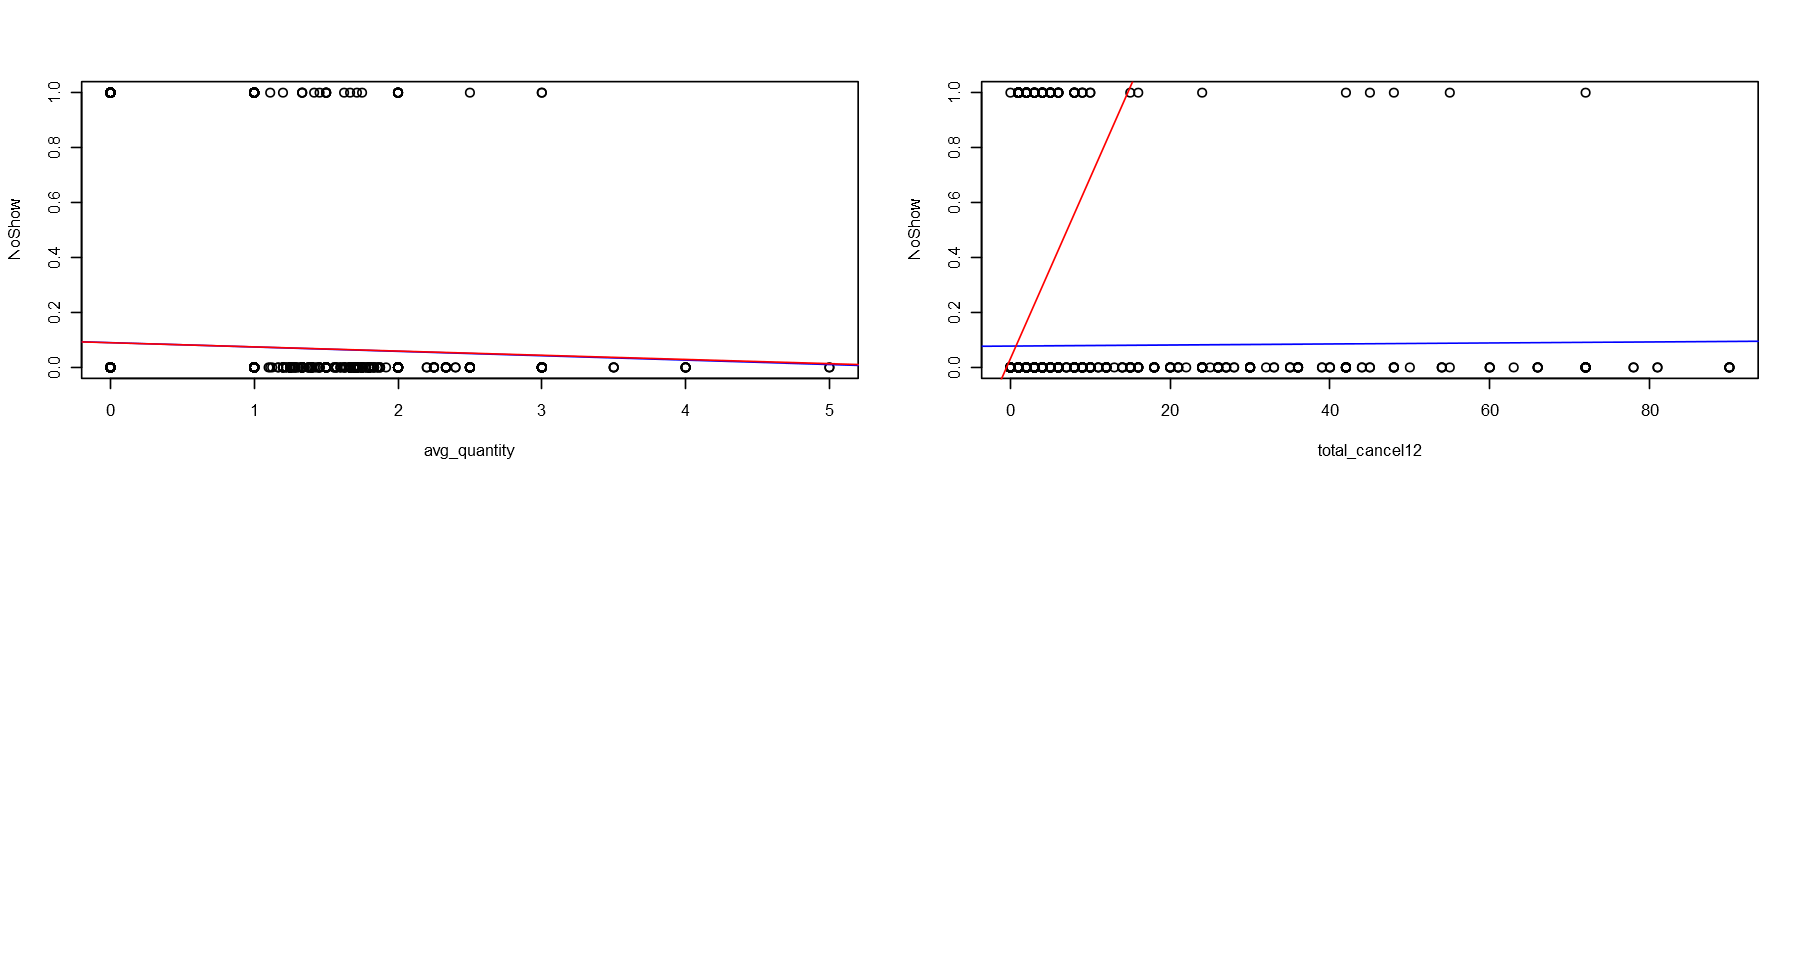

In [175]:
par(mfrow=c(2,2))
for (v in NoShow_continuous){
            a <- max(df[[v]],na.rm=TRUE)
            b1 <- df %>% select(NoShow,v)   
            b2 <- df %>% select(NoShow,v) %>% filter(df_outliers[[paste0(v,'_out')]]==0) 
            plot (b1[[v]],b1$NoShow,xlab=v,ylab='NoShow',xlim=c(0,a))
            abline(coef(lm(b1$NoShow~b1[[v]])), col='blue')
            if (length(unique(b2[[v]]))!=1){
            abline(coef(lm(b2$NoShow~b2[[v]])), col = "red")}
    }

### Table with variables having outliers.

לפי הגרפים למעלה ניתן לראות כי מחיקה של של ערכי קיצון תשנה את ההתפלגות של של הנתונים בחלק מהערכים , לכן במקרה כזה נעשה טרנספורמציה לנתונים, נבדוק את  הנתונים מחדש לאחר טרנספורמציה ונעדכן את הדאטה בהתאם 
במקרים בהם ההתפלגות והתוצאה לא משתנות ניתן למחוק את ערכי הקיצון ע"י שימוש בוקטור של החסרים 

| Variable                     | Treatment | Why                                                      |
|------------------------------|-----------|----------------------------------------------------------|
| cancel_days                  | Leave     | It changes both the assumption the results               |
| quantity                     | Drop      | It changes the assumption but dosen't change the results |
| amount                       | Drop      | It changes the assumption but dosen't change the results |
| avg_recepit                  | Drop      | It changes the assumption but dosen't change the results |
| avg_quantity                 | Drop      | It changes the assumption but dosen't change the results |
| total_cancel12               | Leave     | It changes both the assumption the results               |

### Cleansed dataset for Outliers

#### Transforming cancel_days

In [181]:
mod1 <- glm(df$NoShow ~ df$cancel_days)
mod2 <- glm(df$NoShow ~ cancel_days.noout)

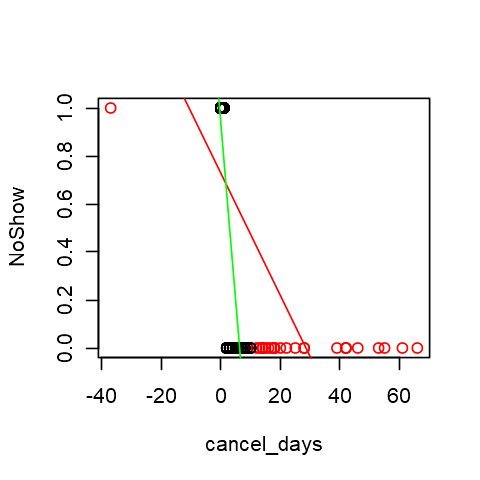

In [182]:
options(repr.plot.width = 4, repr.plot.height = 4)
plot(df$cancel_days, df$NoShow, col=factor(cancel_days.out),xlab="cancel_days",ylab="NoShow")
abline(mod1, col="red") 
abline(mod2, col="green")